In [4]:
import numpy as np
import pandas as pd 
import re
import joblib 
import matplotlib.pyplot as plt
import seaborn as sns

from tqdm import tqdm
from sklearn.preprocessing import StandardScaler

from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import sklearn.metrics as mt
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import (
    export_graphviz,
    DecisionTreeClassifier,
    DecisionTreeRegressor
    )
    ## check


from sklearn.ensemble import(
    RandomForestClassifier, ## check
    VotingClassifier,
    GradientBoostingClassifier,
    RandomForestRegressor
    )
from sklearn.metrics import(
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay, 
    recall_score,
    precision_score,
    mean_squared_error,
    mean_absolute_error,
    r2_score
    )     ##check
from sklearn.model_selection import (
    train_test_split,
    KFold ,
    StratifiedShuffleSplit,  ## check
    cross_val_score,     ##check
    RandomizedSearchCV
    )


In [5]:
keywords = ["auto","construct","capital_market","chemicals","equipment",
            "transport","semi","bank","steel",
            "telecom","staples","discretionary","kospi"]

In [9]:
dfs = {}  # 빈 딕셔너리 생성
column_names_per_keyword = {}

# 각 키워드에 해당하는 데이터프레임을 dfs 딕셔너리에 추가
for keyword in keywords:
    dfs[keyword] = pd.read_excel(r"total_raw_0.3ver.xlsx", sheet_name=keyword, header=0, index_col=0)
    column_names_per_keyword[keyword] = dfs[keyword].columns.tolist()

    print(f"Compile {keyword}")

# 각 데이터프레임의 인덱스를 날짜 형식으로 변환한 후 문자열로 변경
for keyword, df in dfs.items():
    df.index = pd.to_datetime(df.index)
    df.index = df.index.strftime('%Y-%m-%d')

# 첫 2개 행을 출력
for keyword, df in dfs.items():
    print(f"Top 2 rows of {keyword}:")
    print(df.head(2))
    print(column_names_per_keyword[keyword])

# 첫 번째 데이터프레임의 인덱스를 df_index에 복사하여 초기화
df_index_auto = list(dfs.values())[0]
df_index_construct = list(dfs.values())[1]
df_index_capital_market = list(dfs.values())[2]
df_index_chemicals = list(dfs.values())[3]
df_index_equipment = list(dfs.values())[4]
df_index_transport = list(dfs.values())[5]
df_index_semi = list(dfs.values())[6]
df_index_bank = list(dfs.values())[7]
df_index_steel = list(dfs.values())[8]
df_index_telecom = list(dfs.values())[9]
df_index_staples = list(dfs.values())[10]
df_index_discretionary = list(dfs.values())[11]
df_index_kospi = list(dfs.values())[12]


Compile auto
Compile construct
Compile capital_market
Compile chemicals
Compile equipment
Compile transport
Compile semi
Compile bank
Compile steel
Compile telecom
Compile staples
Compile discretionary
Compile kospi
Top 2 rows of auto:
             auto    WTI  DGS2  DGS10  TIPS    VIX    PPI    per    pbr  \
date                                                                      
2010-04-01  S_buy  84.53  1.05   3.89  1.61  17.47  172.2  24.13  24.13   
2010-04-05  S_buy  86.36  1.18   4.01  1.70  17.02  172.2  24.22  24.22   

               원달러  ...   구리선물_60  중국고정자산투자(yoy%)_60  중국 PMI_60   금 선물_60  \
date                ...                                                     
2010-04-01  1131.3  ...  0.000842          -0.003191  -0.001859 -0.000108   
2010-04-05  1126.0  ...  0.001063          -0.003258  -0.001785 -0.000062   

            달러 인덱스_60  중국 소매판매_60  중국 산업 생산_60  MSCI_EMER_60  US_auto_60  \
date                                                                       
20

In [10]:
# 각 데이터프레임의 열 이름 출력
for keyword, column_names in column_names_per_keyword.items():
    print(f"Column names for {keyword}: {column_names}")


Column names for auto: ['auto', 'WTI', 'DGS2', 'DGS10', 'TIPS', 'VIX', 'PPI', 'per', 'pbr', '원달러', '원엔', '3년물 ', '10년물 ', 'treasury_10_3_diff', 'T10Y2Y', 'usa_cpi', 'us_e_infla', 'yield_gap(%)', 'cpi', 'export', '구리선물', '중국고정자산투자(yoy%)', '중국 PMI', '금 선물', '달러 인덱스', '중국 소매판매', '중국 산업 생산', 'MSCI_EMER', 'US_auto', 'export_auto', 'WTI_20', 'DGS2_20', 'DGS10_20', 'TIPS_20', 'VIX_20', 'PPI_20', 'per_20', 'pbr_20', '원달러_20', '원엔_20', '3년물 _20', '10년물 _20', 'treasury_10_3_diff_20', 'T10Y2Y_20', 'usa_cpi_20', 'us_e_infla_20', 'yield_gap(%)_20', 'cpi_20', 'export_20', '구리선물_20', '중국고정자산투자(yoy%)_20', '중국 PMI_20', '금 선물_20', '달러 인덱스_20', '중국 소매판매_20', '중국 산업 생산_20', 'MSCI_EMER_20', 'US_auto_20', 'export_auto_20', 'WTI_60', 'DGS2_60', 'DGS10_60', 'TIPS_60', 'VIX_60', 'PPI_60', 'per_60', 'pbr_60', '원달러_60', '원엔_60', '3년물 _60', '10년물 _60', 'treasury_10_3_diff_60', 'T10Y2Y_60', 'usa_cpi_60', 'us_e_infla_60', 'yield_gap(%)_60', 'cpi_60', 'export_60', '구리선물_60', '중국고정자산투자(yoy%)_60', '중국 PMI_60', '금 선물_6

In [11]:
print(len(df_index_kospi.columns))
print(len(df_index_discretionary.columns))


82
88


In [12]:
# 첫 2개 행을 출력
for keyword, df in dfs.items():
    print(f"Top 2 rows of {keyword}:")
    print(df.head(2))
    print(f"Column names for {keyword}: {column_names_per_keyword[keyword]}")


Top 2 rows of auto:
             auto    WTI  DGS2  DGS10  TIPS    VIX    PPI    per    pbr  \
date                                                                      
2010-04-01  S_buy  84.53  1.05   3.89  1.61  17.47  172.2  24.13  24.13   
2010-04-05  S_buy  86.36  1.18   4.01  1.70  17.02  172.2  24.22  24.22   

               원달러  ...   구리선물_60  중국고정자산투자(yoy%)_60  중국 PMI_60   금 선물_60  \
date                ...                                                     
2010-04-01  1131.3  ...  0.000842          -0.003191  -0.001859 -0.000108   
2010-04-05  1126.0  ...  0.001063          -0.003258  -0.001785 -0.000062   

            달러 인덱스_60  중국 소매판매_60  중국 산업 생산_60  MSCI_EMER_60  US_auto_60  \
date                                                                       
2010-04-01   0.000870    0.006153    -0.007687      0.000181   -0.001737   
2010-04-05   0.000855    0.006087    -0.007304      0.000369   -0.001560   

            export_auto_60  
date                        
2010-04

In [13]:
df_index_telecom.head(2)

,telecom,WTI,DGS2,DGS10,TIPS,VIX,PPI,per,pbr,원달러,...,구리선물_60,중국고정자산투자(yoy%)_60,중국 PMI_60,금 선물_60,달러 인덱스_60,중국 소매판매_60,중국 산업 생산_60,MSCI_EMER_60,통신배당_60,IT산업별/월별 수출 현황 중 통신기기 소계_60
date,,,,,,,,,,,,,,,,,,,,,
2010-04-01,S_buy,84.53,1.05,3.89,1.61,17.47,172.2,24.13,24.13,1131.3,...,0.000842,-0.003191,-0.001859,-0.000108,0.000870,0.006153,-0.007687,0.000181,0.002829,-0.001122
2010-04-05,S_buy,86.36,1.18,4.01,1.70,17.02,172.2,24.22,24.22,1126.0,...,0.001063,-0.003258,-0.001785,-0.000062,0.000855,0.006087,-0.007304,0.000369,0.002899,-0.000808


In [14]:
for keyword, df in dfs.items():
    df.head(2).info()

<class 'pandas.core.frame.DataFrame'>
Index: 2 entries, 2010-04-01 to 2010-04-05
Data columns (total 88 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   auto                   2 non-null      object 
 1   WTI                    2 non-null      float64
 2   DGS2                   2 non-null      float64
 3   DGS10                  2 non-null      float64
 4   TIPS                   2 non-null      float64
 5   VIX                    2 non-null      float64
 6   PPI                    2 non-null      float64
 7   per                    2 non-null      float64
 8   pbr                    2 non-null      float64
 9   원달러                    2 non-null      float64
 10  원엔                     2 non-null      float64
 11  3년물                    2 non-null      float64
 12  10년물                   2 non-null      float64
 13  treasury_10_3_diff     2 non-null      float64
 14  T10Y2Y                 2 non-null      float64
 1

In [15]:
data_splits = {}
for keyword, df_index in dfs.items():
    df_dropna = df_index.dropna()  # 결측치가 있는 행 제거
    
    if df_dropna.empty:
        print(f"Error: Dataframe for {keyword} is empty.")
    else:
        # 종속 변수(y) 및 독립 변수(X) 설정
        y_keyword = df_dropna[keyword]  # 현재 키워드에 해당하는 종속 변수
        X_keyword = df_dropna.drop(columns=[keyword])  # 현재 키워드를 제외한 나머지 열은 독립 변수로 사용

        # 데이터 분할
        X_train, X_test, y_train, y_test = train_test_split(X_keyword, y_keyword, test_size=0.2, random_state=0)
        
        # 데이터 정규화
        normalizer = StandardScaler()
        X_train_normalized = normalizer.fit_transform(X_train)
        X_test_normalized = normalizer.transform(X_test)

        # 데이터 저장
        data_splits[keyword] = {
            'X_train': X_train_normalized,
            'X_test': X_test_normalized,
            'y_train': y_train,
            'y_test': y_test
        }

        print(f'Train set dimension for {keyword} is {X_train_normalized.shape}')
        print(f'Test set dimension for {keyword} is {X_test_normalized.shape}')
        # 훈련 데이터와 테스트 데이터의 클래스 비율 확인
        train_class_counts = {label: sum(y_train == label) for label in set(y_keyword)}
        test_class_counts = {label: sum(y_test == label) for label in set(y_keyword)}

        print(f"훈련 데이터 클래스 비율 for {keyword}:", train_class_counts)
        print(f"테스트 데이터 클래스 비율 for {keyword}:", test_class_counts)

Train set dimension for auto is (2640, 87)
Test set dimension for auto is (660, 87)
훈련 데이터 클래스 비율 for auto: {'buy': 497, 'S_buy': 854, 'sell': 1289}
테스트 데이터 클래스 비율 for auto: {'buy': 128, 'S_buy': 222, 'sell': 310}
Train set dimension for construct is (2639, 87)
Test set dimension for construct is (660, 87)
훈련 데이터 클래스 비율 for construct: {'sell': 1319, 'S_buy': 936, 'buy': 384}
테스트 데이터 클래스 비율 for construct: {'sell': 316, 'S_buy': 239, 'buy': 105}
Train set dimension for capital_market is (2640, 87)
Test set dimension for capital_market is (660, 87)
훈련 데이터 클래스 비율 for capital_market: {'sell': 1340, 'S_buy': 857, 'buy': 443}
테스트 데이터 클래스 비율 for capital_market: {'sell': 318, 'S_buy': 227, 'buy': 115}
Train set dimension for chemicals is (2640, 87)
Test set dimension for chemicals is (660, 87)
훈련 데이터 클래스 비율 for chemicals: {'buy': 466, 'S_buy': 910, 'sell': 1264}
테스트 데이터 클래스 비율 for chemicals: {'buy': 145, 'S_buy': 216, 'sell': 299}
Train set dimension for equipment is (2640, 87)
Test set dimensi

### 여러가지 실험을 했다
1. logistic_regression
2. random_forest
3. gradient_boosting
4. svm
5. neural_network

In [16]:
accuracies = {}

# 각 키워드에 대한 분류기 및 Voting Classifier 생성
for keyword, data_split in data_splits.items():
    X_train = data_split['X_train']
    X_test = data_split['X_test']
    y_train = data_split['y_train']
    y_test = data_split['y_test']
    
    random_forest = RandomForestClassifier()
    gradient_boosting = GradientBoostingClassifier()
    svm = SVC()
    knn = KNeighborsClassifier()
    decision_tree = DecisionTreeClassifier()

    # Voting Classifier 생성
    voting_classifier = VotingClassifier(
        estimators=[
            ('rf', random_forest), 
            ('gb', gradient_boosting), 
            ('svm', svm), 
            ('knn', knn),
            ('dt', decision_tree)
        ],
        voting='hard'
    )

    models = {
        'Random Forest': random_forest,
        'Gradient Boosting': gradient_boosting,
        'Support Vector Machine': svm,
        'K-Nearest Neighbors': knn,
        'Decision Tree': decision_tree,
        'Voting Classifier': voting_classifier
    }

    # 각 분류기에 대해 학습하고 평가
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        accuracies[f'{keyword}_{name}'] = accuracy
        print(f"{keyword} 키워드로 학습한 {name}의 정확도: {accuracy}")

    # 가장 높은 정확도를 가진 모델 찾기
    best_model_name = max(accuracies, key=accuracies.get)
    best_accuracy = accuracies[best_model_name]

    print(f"최고의 성능을 보인 모델은 {best_model_name}로, 정확도는 {best_accuracy:.3f}입니다.")

auto 키워드로 학습한 Random Forest의 정확도: 0.8212121212121212
auto 키워드로 학습한 Gradient Boosting의 정확도: 0.7787878787878788
auto 키워드로 학습한 Support Vector Machine의 정확도: 0.7545454545454545
auto 키워드로 학습한 K-Nearest Neighbors의 정확도: 0.806060606060606
auto 키워드로 학습한 Decision Tree의 정확도: 0.7727272727272727
auto 키워드로 학습한 Voting Classifier의 정확도: 0.8121212121212121
최고의 성능을 보인 모델은 auto_Random Forest로, 정확도는 0.821입니다.
construct 키워드로 학습한 Random Forest의 정확도: 0.8242424242424242
construct 키워드로 학습한 Gradient Boosting의 정확도: 0.7878787878787878
construct 키워드로 학습한 Support Vector Machine의 정확도: 0.7560606060606061
construct 키워드로 학습한 K-Nearest Neighbors의 정확도: 0.8075757575757576
construct 키워드로 학습한 Decision Tree의 정확도: 0.7863636363636364
construct 키워드로 학습한 Voting Classifier의 정확도: 0.8242424242424242
최고의 성능을 보인 모델은 construct_Random Forest로, 정확도는 0.824입니다.
capital_market 키워드로 학습한 Random Forest의 정확도: 0.8136363636363636
capital_market 키워드로 학습한 Gradient Boosting의 정확도: 0.7924242424242425
capital_market 키워드로 학습한 Support Vector Machine의 정확도:

In [17]:
best_models = {}  # 각 키워드에 대한 최고의 모델을 저장할 딕셔너리
# 각 키워드에 대한 최고의 모델을 출력
for keyword, best_model in best_models.items():
    print(f"{keyword} 키워드에 대한 최적의 모델은 {best_model} 입니다.")


### 최고의 성능 대부분은 Random Forest 모델로, 정확도는 0.8 대략 정확도 80%


### 따라서 randomforest 로 진행

### 그러면은 단순 모델링을 해보자

In [18]:
# Train set 및 Test set에 대한 성능을 저장할 딕셔너리 생성
performance_results = {}

# Random Forest 모델 생성
rfc = RandomForestClassifier()

# 각 키워드에 대해 모델을 학습하고 Train set 및 Test set에 대한 성능을 측정
for keyword, data_split in data_splits.items():
    X_train = data_split['X_train']
    y_train = data_split['y_train']
    X_test = data_split['X_test']
    y_test = data_split['y_test']
    
    # 모델 학습
    rfc.fit(X_train, y_train)

    # Train set에 대한 성능 측정
    y_pred_train = rfc.predict(X_train)
    acc_train = accuracy_score(y_true=y_train, y_pred=y_pred_train)

    # Test set에 대한 성능 측정
    y_pred_test = rfc.predict(X_test)
    acc_test = accuracy_score(y_true=y_test, y_pred=y_pred_test)

    # 결과 저장
    performance_results[keyword] = {
        'Train 성능': acc_train,
        'Test 성능': acc_test
    }

# 각 키워드에 대한 Train set 및 Test set의 성능 출력
for keyword, performance in performance_results.items():
    print(f"{keyword} 키워드에 대한 성능: ",performance['Test 성능'])
    print()

auto 키워드에 대한 성능:  0.8151515151515152

construct 키워드에 대한 성능:  0.8242424242424242

capital_market 키워드에 대한 성능:  0.8333333333333334

chemicals 키워드에 대한 성능:  0.7984848484848485

equipment 키워드에 대한 성능:  0.85

transport 키워드에 대한 성능:  0.8515151515151516

semi 키워드에 대한 성능:  0.793939393939394

bank 키워드에 대한 성능:  0.8075757575757576

steel 키워드에 대한 성능:  0.8106060606060606

telecom 키워드에 대한 성능:  0.803030303030303

staples 키워드에 대한 성능:  0.8257575757575758

discretionary 키워드에 대한 성능:  0.793939393939394

kospi 키워드에 대한 성능:  0.8257575757575758



### test set에 대해서 성능이 한 80~87%정도 나온다 약간 상승!

In [19]:
estimator_list = list(range(1, 21))  # 1부터 20까지의 값을 가지는 리스트
depth_list = list(range(1, 21))  # 1부터 20까지의 값을 가지는 리스트

cv_scores_per_keyword = {}  # 각 키워드에 대한 교차 검증 점수를 저장할 딕셔너리
best_estimators_per_keyword = {}  # 각 키워드에 대한 최적의 트리 수를 저장할 딕셔너리
best_depths_per_keyword = {}  # 각 키워드에 대한 최적의 깊이를 저장할 딕셔너리

# 각 키워드에 대한 분류기 및 Voting Classifier 생성
for keyword, data_split in data_splits.items():
    X_train = data_split['X_train']
    y_train = data_split['y_train']
    
    cv_scores = []  # 교차 검증 점수를 저장할 리스트
    cv_scores_depth = []  # 교차 검증 점수를 저장할 리스트
    
    for i in tqdm(range(20)):
        rfc = RandomForestClassifier(n_estimators=i+1,
                                     max_leaf_nodes=300,
                                     n_jobs=-1,
                                     random_state=0)
        score = cross_val_score(rfc, X_train, y_train, cv=10, scoring='accuracy').mean()
        cv_scores.append(score)

    best_estimator = estimator_list[np.argmax(cv_scores)]
    best_estimators_per_keyword[keyword] = best_estimator
    
    for i in tqdm(range(20)):
        rfc = RandomForestClassifier(n_estimators=best_estimator,
                                     max_depth=i+1,
                                     max_leaf_nodes=300,
                                     n_jobs=-1,
                                     random_state=0)
        score = cross_val_score(rfc, X_train, y_train, cv=10, scoring='accuracy').mean()
        cv_scores_depth.append(score)

    best_depth = depth_list[np.argmax(cv_scores_depth)]
    best_depths_per_keyword[keyword] = best_depth
    
    # 교차 검증 점수를 딕셔너리에 저장
    cv_scores_per_keyword[keyword] = {'tree_scores': cv_scores, 'depth_scores': cv_scores_depth}

# 각 키워드에 대한 최적의 트리 수와 깊이 출력
for keyword in data_splits.keys():
    best_estimator = best_estimators_per_keyword[keyword]
    best_depth = best_depths_per_keyword[keyword]
    print(f"{keyword} 키워드에 대한 최적의 트리 수는 {best_estimator}, 최적의 깊이는 {best_depth} 입니다.")

# 각 키워드에 대한 교차 검증 점수 시각화
plt.figure(figsize=(20, 10))
for keyword, scores in cv_scores_per_keyword.items():
    plt.plot(estimator_list, scores['tree_scores'], marker='o', linestyle='dashed', label=f"{keyword} Keyword - Tree")
    plt.plot(depth_list, scores['depth_scores'], marker='o', linestyle='dashed', label=f"{keyword} Keyword - Depth")
plt.legend(fontsize=20)
plt.xlabel("Number of Trees / Max Depth", fontsize=20)
plt.ylabel("Accuracy", fontsize=20)
plt.title("Accuracy Score", fontsize=25)
for keyword in data_splits.keys():
    best_estimator = best_estimators_per_keyword[keyword]
    best_depth = best_depths_per_keyword[keyword]
    plt.axvline(best_estimator, color='r', linestyle='--', linewidth=2)
    plt.axvline(best_depth, color='g', linestyle='--', linewidth=2)
plt.show()


 75%|███████▌  | 15/20 [00:36<00:15,  3.20s/it]

In [ ]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.ensemble import RandomForestClassifier

# # 튜닝할 하이퍼파라미터 조합 지정
# param_grid = {
#     'n_estimators':[best_e[0]-20,best_e[0]-10,best_e[0],best_e[0]+10,best_e[0]+20],  # 결정 트리 개수
#     'max_depth':[ best_depth[0]-20,best_depth[0]-10,best_depth[0],best_depth[0]+10,best_depth[0]+20],  # 최대 깊이
#     'max_leaf_nodes': [None],  # 리프 노드의 최대 개수
# }

# # 그리드 서치 모델 생성
# rfc = RandomForestClassifier(random_state=0)
# grid_search = GridSearchCV(rfc, param_grid ,cv=10,scoring='accuracy')

# # 그리드 서치 수행
# grid_search.fit(X_train, y_train)

# # 최적의 하이퍼파라미터 조합 출력
# print("Best Parameters:", grid_search.best_params_)

# # 최적의 모델 추출
# best_rfc = grid_search.best_estimator_

# # 테스트 데이터에 대한 예측
# y_pred = best_rfc.predict(X_test)

# # 정확도 계산
# acc = accuracy_score(y_true=y_test, y_pred=y_pred)
# print("튜닝된 모델에 대한 성능")  
# print(f"정확도: {acc:.4f}")
# #정확도: 0.8147


In [ ]:
# # 최적의 하이퍼 파라미터 셋
# grid_search.best_params_

### 조금더 상승했다!

In [ ]:
# best_rfc = RandomForestClassifier(n_estimators= best_e[0],max_depth=best_depth[0],n_jobs=-1,random_state=0)
# # param_grid = {
# #     'max_depth': [10,14,18,22],
# #     'max_leaf_nodes': [100,200,300,400,500],
# #     'criterion':['entropy'],
# #     'max_features':['sqrt']
# # }
# # CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=10, verbose=1 ,n_jobs=-1)
# # CV_rfc.fit(X_train, y_train)

In [ ]:
# # 최적의 하이퍼 파라미터 셋
# CV_rfc.best_params_

In [ ]:
# result_table = pd.DataFrame(CV_rfc.cv_results_)
# result_table = result_table.sort_values(by='mean_test_score', ascending=False)
# print(result_table[['params', 'mean_test_score']])

In [ ]:
# best_rfc = CV_rfc.best_estimator_
# best_rfc.fit(X_train, y_train)

### 조금더 상승했다!

auto 키워드에 대한 최적의 트리 개수: 16
auto 키워드에 대한 최적의 깊이 개수: 18


auto 키워드에 대한 Train set에 대한 성능 (10 fold cross validation)
평균 정확도: 0.8345
auto 키워드에 대한 Test set에 대한 성능
정확도: 0.8091

auto 키워드에 대한 Test set에 대한 민감도와 정밀도
민감도: 0.8027, 정밀도: 0.7997



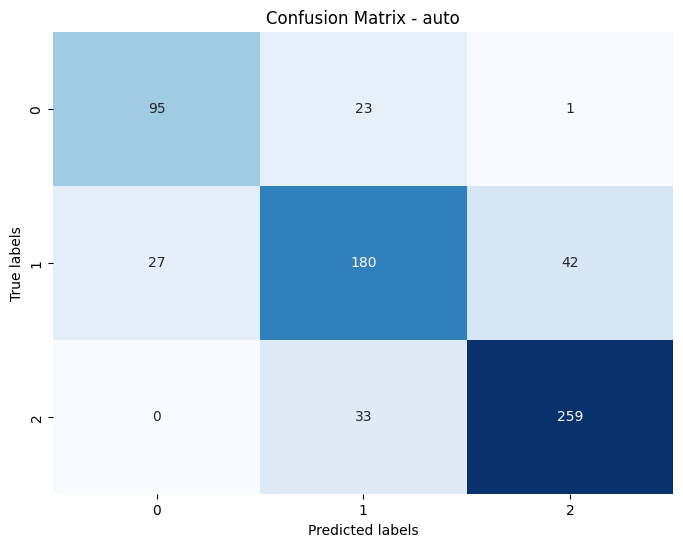

construct 키워드에 대한 최적의 트리 개수: 17
construct 키워드에 대한 최적의 깊이 개수: 20
construct 키워드에 대한 Train set에 대한 성능 (10 fold cross validation)
평균 정확도: 0.8424
construct 키워드에 대한 Test set에 대한 성능
정확도: 0.8091

construct 키워드에 대한 Test set에 대한 민감도와 정밀도
민감도: 0.7996, 정밀도: 0.7988



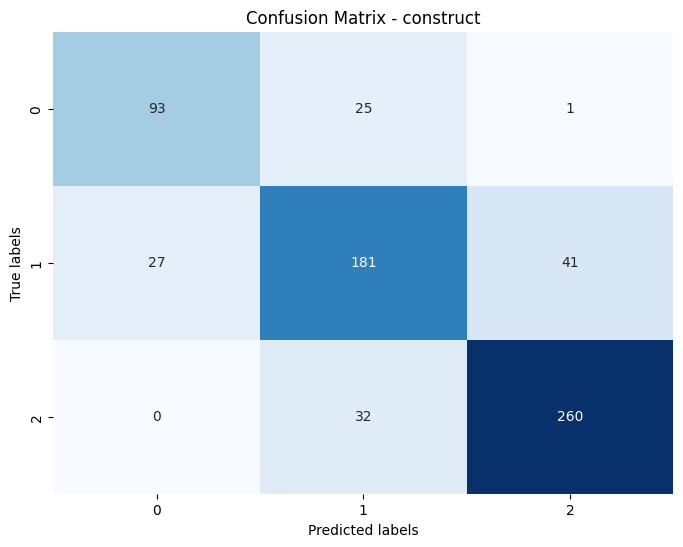

capital_market 키워드에 대한 최적의 트리 개수: 18
capital_market 키워드에 대한 최적의 깊이 개수: 19
capital_market 키워드에 대한 Train set에 대한 성능 (10 fold cross validation)
평균 정확도: 0.8405
capital_market 키워드에 대한 Test set에 대한 성능
정확도: 0.8167

capital_market 키워드에 대한 Test set에 대한 민감도와 정밀도
민감도: 0.8092, 정밀도: 0.8084



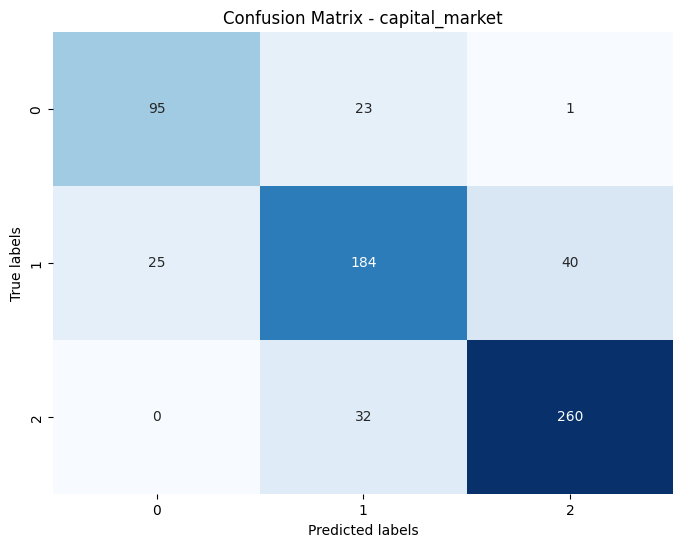

chemicals 키워드에 대한 최적의 트리 개수: 17
chemicals 키워드에 대한 최적의 깊이 개수: 20
chemicals 키워드에 대한 Train set에 대한 성능 (10 fold cross validation)
평균 정확도: 0.8424
chemicals 키워드에 대한 Test set에 대한 성능
정확도: 0.8091

chemicals 키워드에 대한 Test set에 대한 민감도와 정밀도
민감도: 0.7996, 정밀도: 0.7988



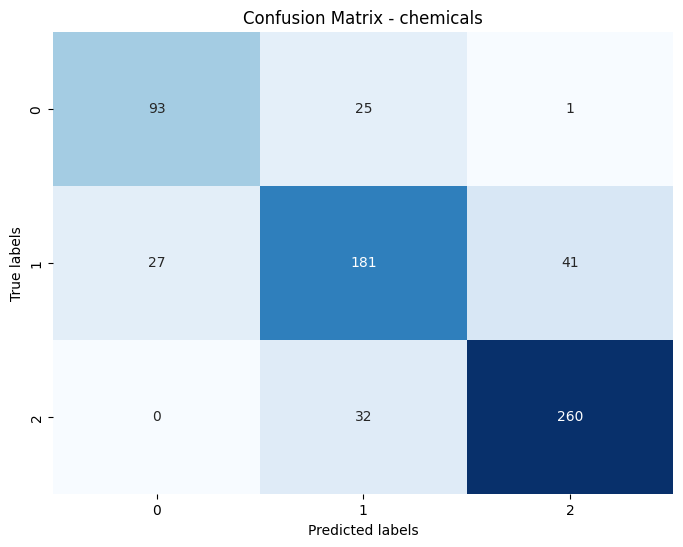

equipment 키워드에 대한 최적의 트리 개수: 20
equipment 키워드에 대한 최적의 깊이 개수: 16
equipment 키워드에 대한 Train set에 대한 성능 (10 fold cross validation)
평균 정확도: 0.8398
equipment 키워드에 대한 Test set에 대한 성능
정확도: 0.8197

equipment 키워드에 대한 Test set에 대한 민감도와 정밀도
민감도: 0.8073, 정밀도: 0.8167



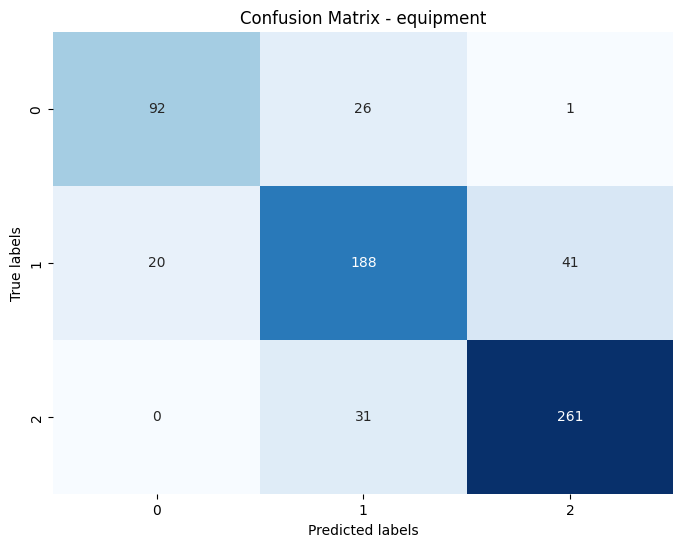

transport 키워드에 대한 최적의 트리 개수: 20
transport 키워드에 대한 최적의 깊이 개수: 18
transport 키워드에 대한 Train set에 대한 성능 (10 fold cross validation)
평균 정확도: 0.8402
transport 키워드에 대한 Test set에 대한 성능
정확도: 0.8152

transport 키워드에 대한 Test set에 대한 민감도와 정밀도
민감도: 0.8097, 정밀도: 0.8053



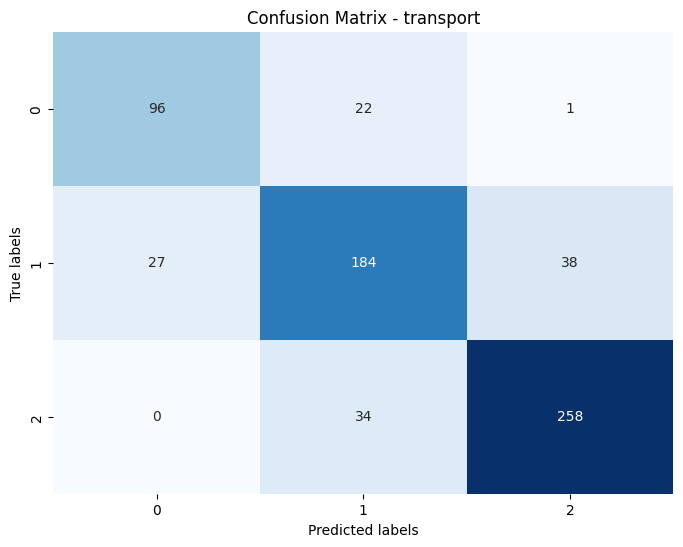

semi 키워드에 대한 최적의 트리 개수: 19
semi 키워드에 대한 최적의 깊이 개수: 16
semi 키워드에 대한 Train set에 대한 성능 (10 fold cross validation)
평균 정확도: 0.8386
semi 키워드에 대한 Test set에 대한 성능
정확도: 0.8242

semi 키워드에 대한 Test set에 대한 민감도와 정밀도
민감도: 0.8126, 정밀도: 0.8179



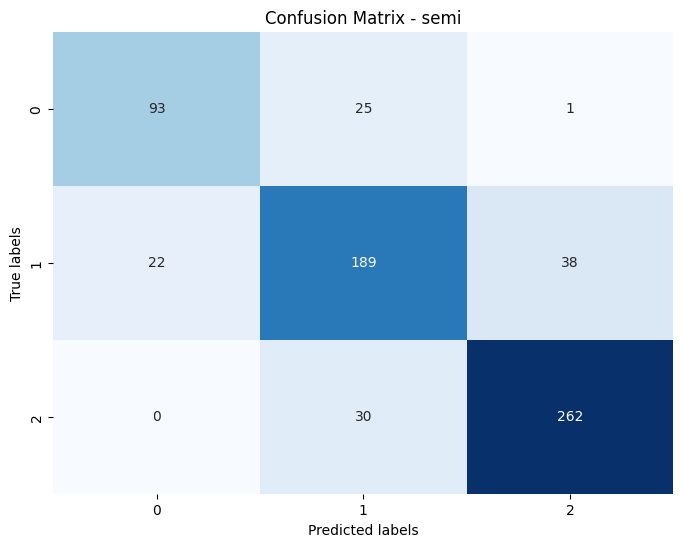

bank 키워드에 대한 최적의 트리 개수: 19
bank 키워드에 대한 최적의 깊이 개수: 19
bank 키워드에 대한 Train set에 대한 성능 (10 fold cross validation)
평균 정확도: 0.8413
bank 키워드에 대한 Test set에 대한 성능
정확도: 0.8152

bank 키워드에 대한 Test set에 대한 민감도와 정밀도
민감도: 0.8077, 정밀도: 0.8086



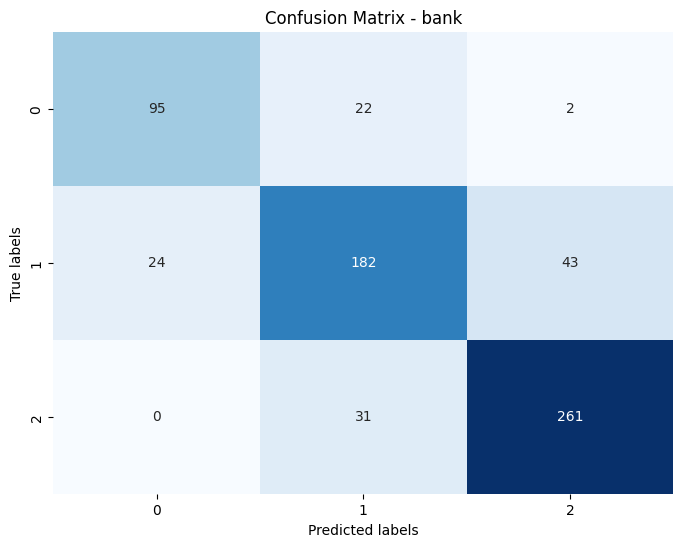

steel 키워드에 대한 최적의 트리 개수: 20
steel 키워드에 대한 최적의 깊이 개수: 16
steel 키워드에 대한 Train set에 대한 성능 (10 fold cross validation)
평균 정확도: 0.8398
steel 키워드에 대한 Test set에 대한 성능
정확도: 0.8197

steel 키워드에 대한 Test set에 대한 민감도와 정밀도
민감도: 0.8073, 정밀도: 0.8167



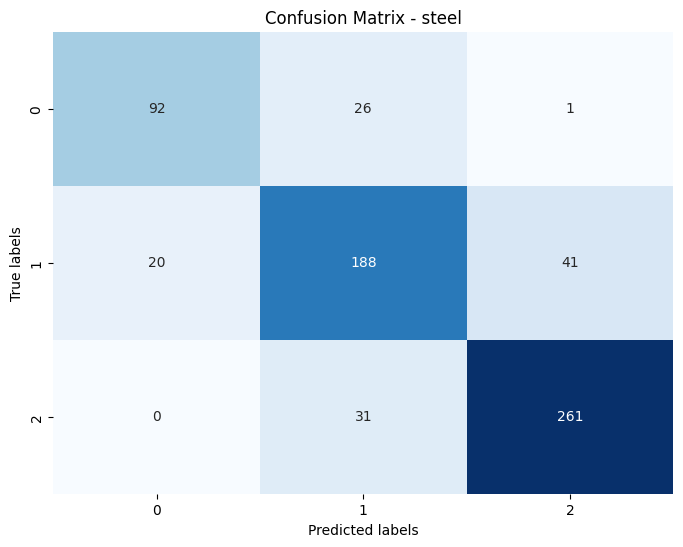

telecom 키워드에 대한 최적의 트리 개수: 20
telecom 키워드에 대한 최적의 깊이 개수: 18
telecom 키워드에 대한 Train set에 대한 성능 (10 fold cross validation)
평균 정확도: 0.8402
telecom 키워드에 대한 Test set에 대한 성능
정확도: 0.8152

telecom 키워드에 대한 Test set에 대한 민감도와 정밀도
민감도: 0.8097, 정밀도: 0.8053



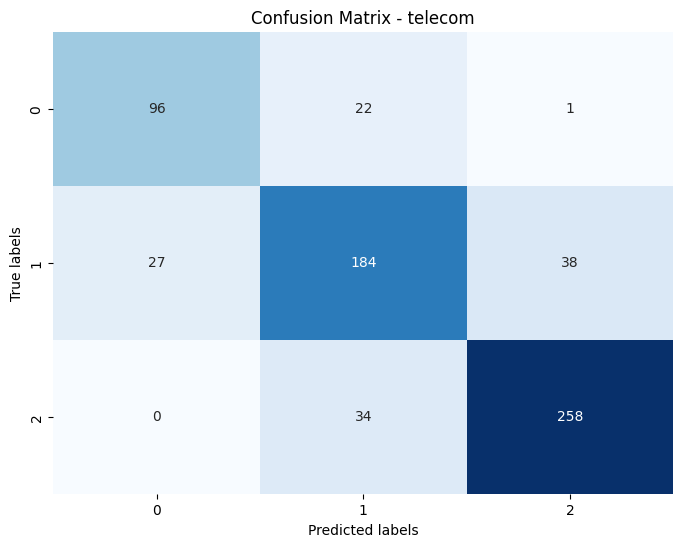

staples 키워드에 대한 최적의 트리 개수: 15
staples 키워드에 대한 최적의 깊이 개수: 20
staples 키워드에 대한 Train set에 대한 성능 (10 fold cross validation)
평균 정확도: 0.8394
staples 키워드에 대한 Test set에 대한 성능
정확도: 0.8152

staples 키워드에 대한 Test set에 대한 민감도와 정밀도
민감도: 0.8048, 정밀도: 0.8075



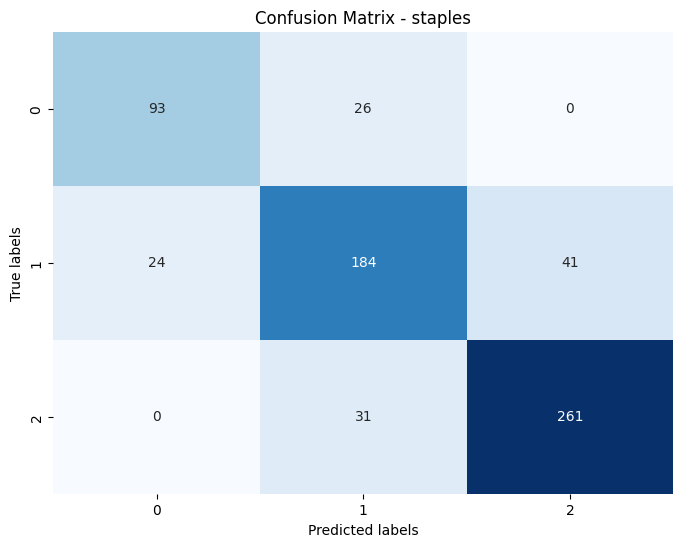

discretionary 키워드에 대한 최적의 트리 개수: 19
discretionary 키워드에 대한 최적의 깊이 개수: 18
discretionary 키워드에 대한 Train set에 대한 성능 (10 fold cross validation)
평균 정확도: 0.8390
discretionary 키워드에 대한 Test set에 대한 성능
정확도: 0.8106

discretionary 키워드에 대한 Test set에 대한 민감도와 정밀도
민감도: 0.8041, 정밀도: 0.7998



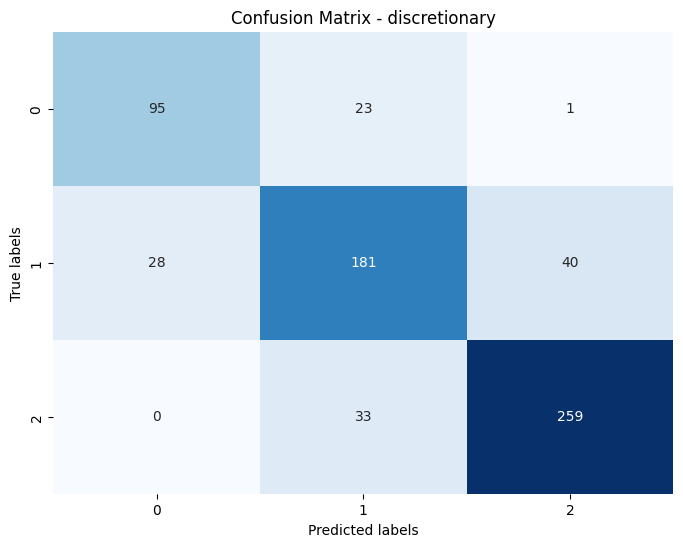

kospi 키워드에 대한 최적의 트리 개수: 19
kospi 키워드에 대한 최적의 깊이 개수: 20
kospi 키워드에 대한 Train set에 대한 성능 (10 fold cross validation)
평균 정확도: 0.8432
kospi 키워드에 대한 Test set에 대한 성능
정확도: 0.8167

kospi 키워드에 대한 Test set에 대한 민감도와 정밀도
민감도: 0.8078, 정밀도: 0.8057



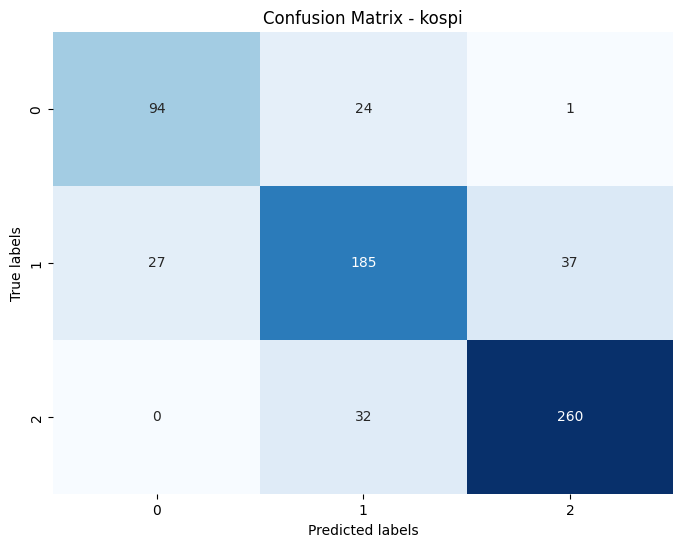

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 각 키워드별 최적의 트리 개수와 최적의 깊이 출력
for keyword in data_splits.keys():
    best_estimator = best_estimators_per_keyword[keyword]
    best_depth = best_depths_per_keyword[keyword]
    print(f"{keyword} 키워드에 대한 최적의 트리 개수: {best_estimator}")
    print(f"{keyword} 키워드에 대한 최적의 깊이 개수: {best_depth}")
    
    # 최적의 트리 개수와 깊이를 사용하여 RandomForestClassifier 초기화
    rfc = RandomForestClassifier(n_estimators=best_estimator, 
                                 max_depth=best_depth, 
                                 max_leaf_nodes=300,
                                 n_jobs=-1,
                                 random_state=0)
    
    # 교차 검증을 통한 정확도 측정
    cv_scores = cross_val_score(rfc, X_train, y_train, cv=10, scoring='accuracy')
    
    # 평균 정확도 출력
    print(f"{keyword} 키워드에 대한 Train set에 대한 성능 (10 fold cross validation)")
    print(f"평균 정확도: {cv_scores.mean():.4f}")
    
    # Train set에 대한 최적의 모델 학습
    rfc.fit(X_train, y_train)
    
    # Test set에 대한 예측값 생성
    y_pred = rfc.predict(X_test)
    
    # Test set에 대한 정확도 계산 및 출력
    acc_test = accuracy_score(y_true=y_test, y_pred=y_pred)
    print(f"{keyword} 키워드에 대한 Test set에 대한 성능")
    print(f"정확도: {acc_test:.4f}\n")
    
    # Test set에 대한 민감도와 정밀도 계산
    recall = recall_score(y_true=y_test, y_pred=y_pred, average='macro')
    precision = precision_score(y_true=y_test, y_pred=y_pred, average='macro')

    # 민감도와 정밀도 출력
    print(f"{keyword} 키워드에 대한 Test set에 대한 민감도와 정밀도")
    print(f"민감도: {recall:.4f}, 정밀도: {precision:.4f}\n")
    
    # 혼동 행렬 생성
    cm = confusion_matrix(y_test, y_pred)

    # 혼동 행렬 시각화
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, cmap=plt.cm.Blues, fmt='d', cbar=False)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title(f'Confusion Matrix - {keyword}')
    plt.show()


### 너무 많다.. 10개로


In [ ]:
# 각 키워드별 상위 5개 특성의 인덱스와 중요도 출력
for keyword, data_split in data_splits.items():
    X_train = data_split['X_train']
    y_train = data_split['y_train']

    best_estimator = best_estimators_per_keyword[keyword]
    best_depth = best_depths_per_keyword[keyword]

    # RandomForestClassifier 초기화 및 학습
    rfc = RandomForestClassifier(n_estimators=best_estimator, 
                                 max_depth=best_depth, 
                                 max_leaf_nodes=300,
                                 n_jobs=-1,
                                 random_state=0)
    rfc.fit(X_train, y_train)

    # Feature Importance 계산
    feats = {}
    for feature, importance in zip(range(X_train.shape[1]), rfc.feature_importances_):
        feats[feature] = importance

    # 중요도 순으로 정렬하여 상위 5개 선택
    sorted_feats = sorted(feats.items(), key=lambda x: x[1], reverse=True)
    top_5_importances = sorted_feats[:5]

    # 상위 5개 특성의 인덱스와 중요도 출력
    print(f"{keyword} 키워드의 상위 5개 특성:")
    for feature_index, importance in top_5_importances:
        feature_name = column_names_per_keyword[keyword][feature_index]  # 열 이름 가져오기
        print(f"Feature Name: {feature_name}, Importance: {importance:.4f}")
    print()
    


auto 키워드의 상위 5개 특성:
Feature Name: us_e_infla, Importance: 0.0227
Feature Name: export_60, Importance: 0.0204
Feature Name: 달러 인덱스_60, Importance: 0.0199
Feature Name: 중국 산업 생산_60, Importance: 0.0195
Feature Name: cpi_20, Importance: 0.0168

construct 키워드의 상위 5개 특성:
Feature Name: 원달러_60, Importance: 0.0222
Feature Name: 중국 산업 생산, Importance: 0.0218
Feature Name: export_60, Importance: 0.0214
Feature Name: TIPS, Importance: 0.0207
Feature Name: 금 선물_60, Importance: 0.0183

capital_market 키워드의 상위 5개 특성:
Feature Name: 구리선물_60, Importance: 0.0291
Feature Name: 중국 산업 생산, Importance: 0.0242
Feature Name: 금 선물_60, Importance: 0.0228
Feature Name: 코스피+코스닥 거래량_20, Importance: 0.0207
Feature Name: pbr_60, Importance: 0.0176

chemicals 키워드의 상위 5개 특성:
Feature Name: usa_cpi_60, Importance: 0.0280
Feature Name: TIPS, Importance: 0.0273
Feature Name: VIX, Importance: 0.0226
Feature Name: naphtha_price_20, Importance: 0.0219
Feature Name: 구리선물_60, Importance: 0.0214

equipment 키워드의 상위 5개 특성:
Feature Na

### 생각보다 자동차지수와 중국 지표 금 구리 이런게 영향을 많이 미치는구마잉!

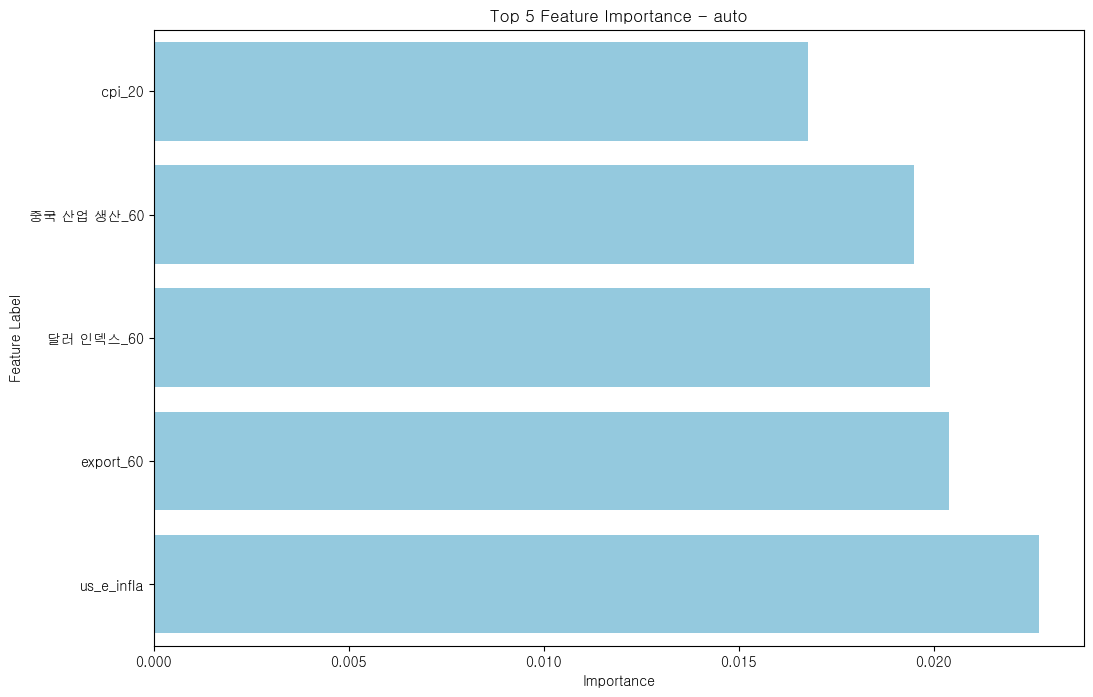

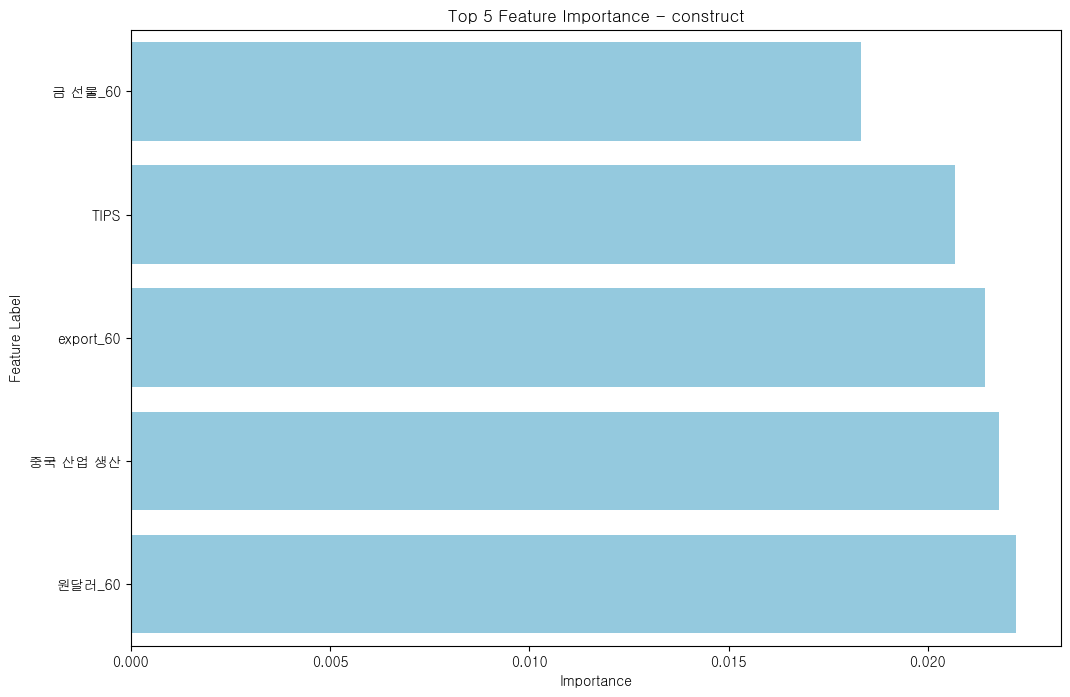

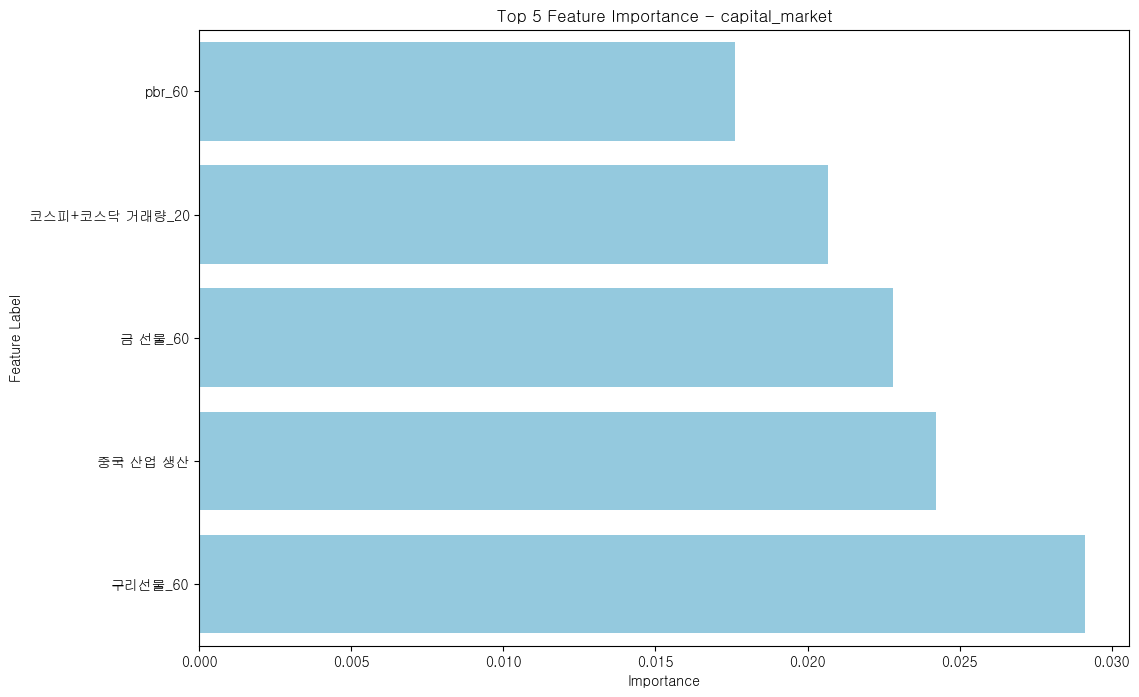

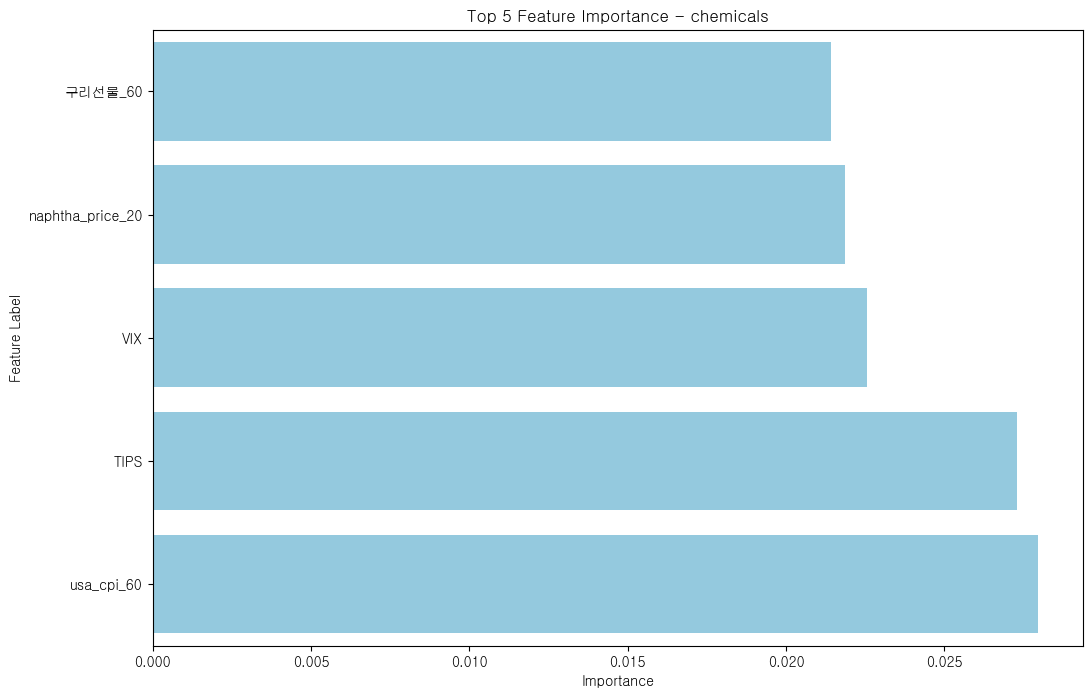

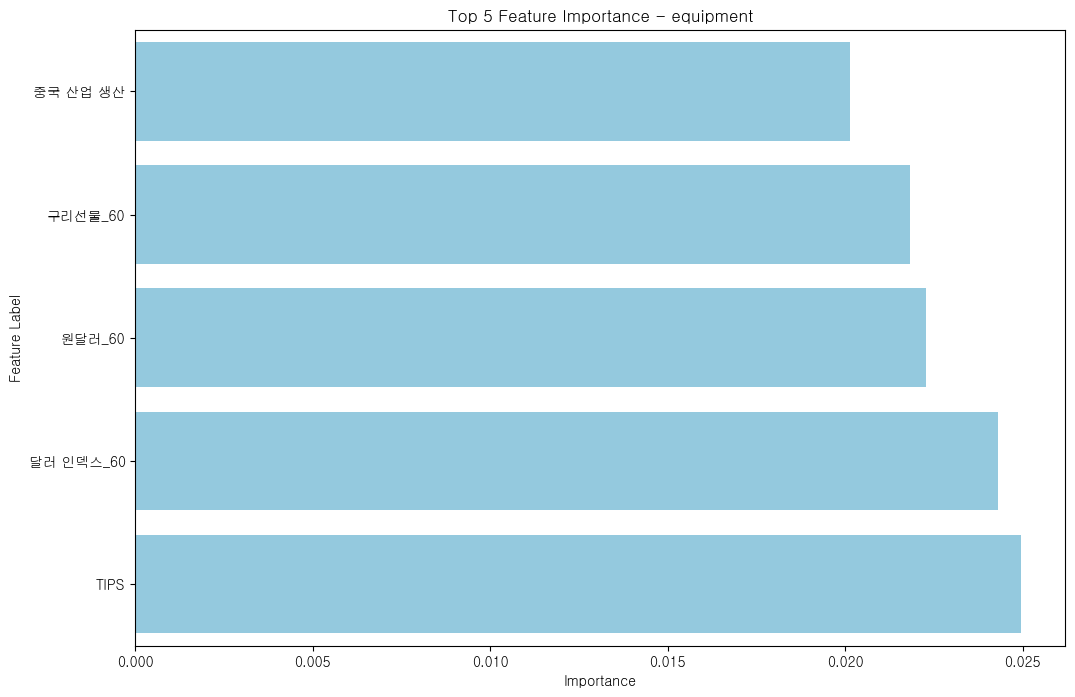

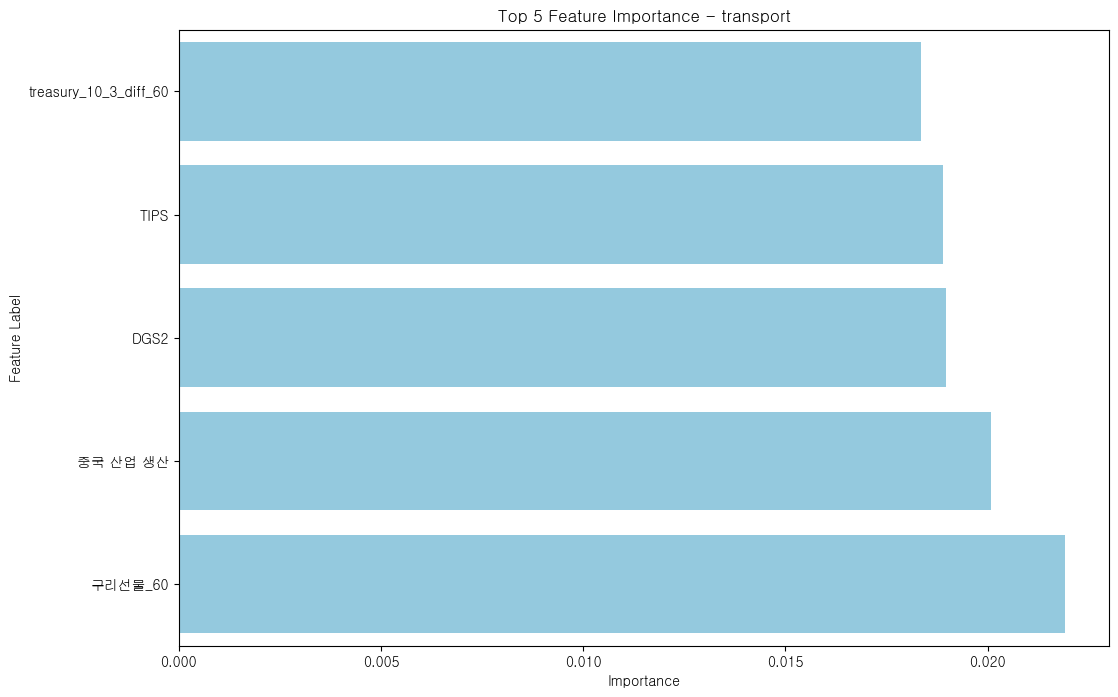

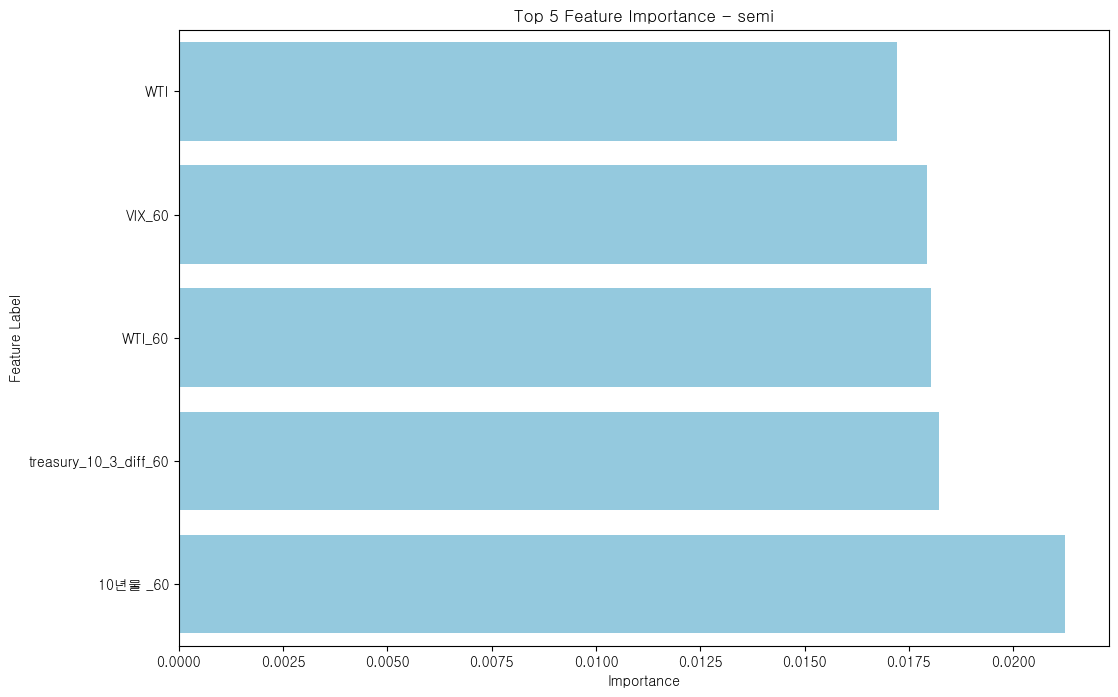

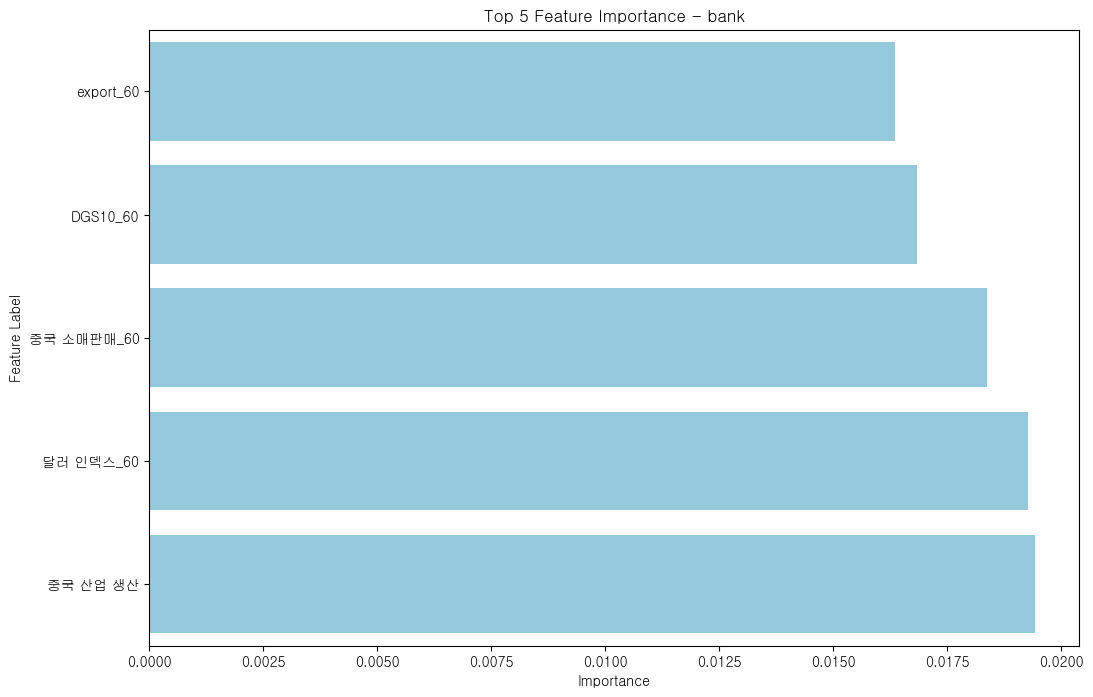

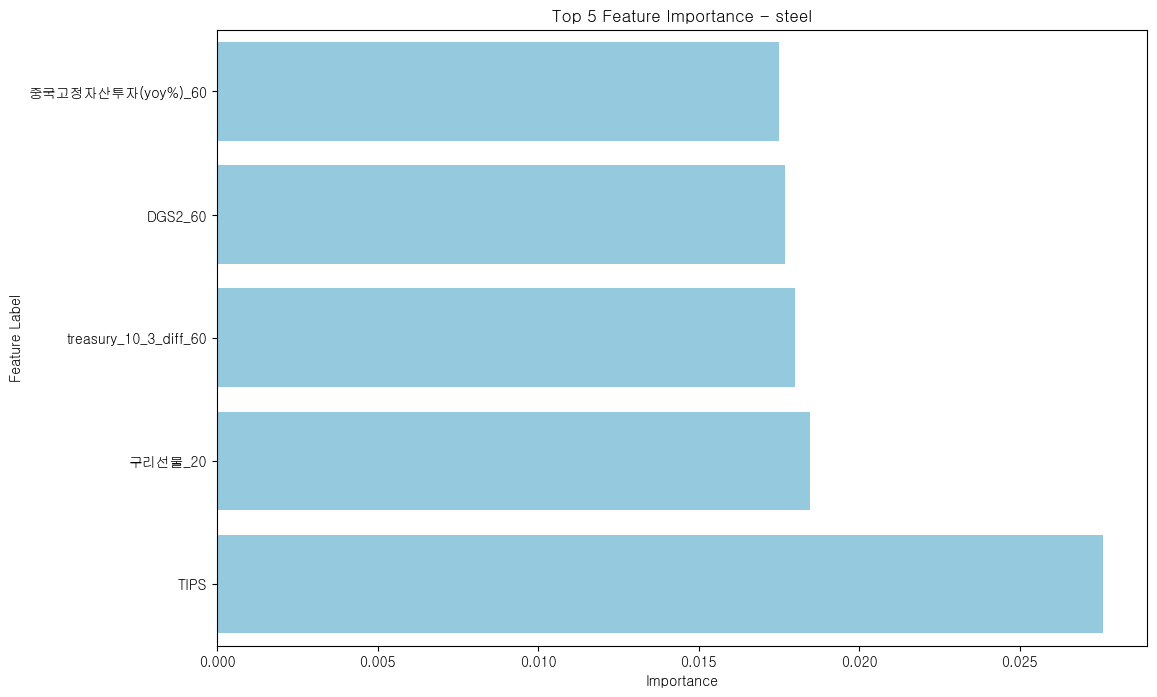

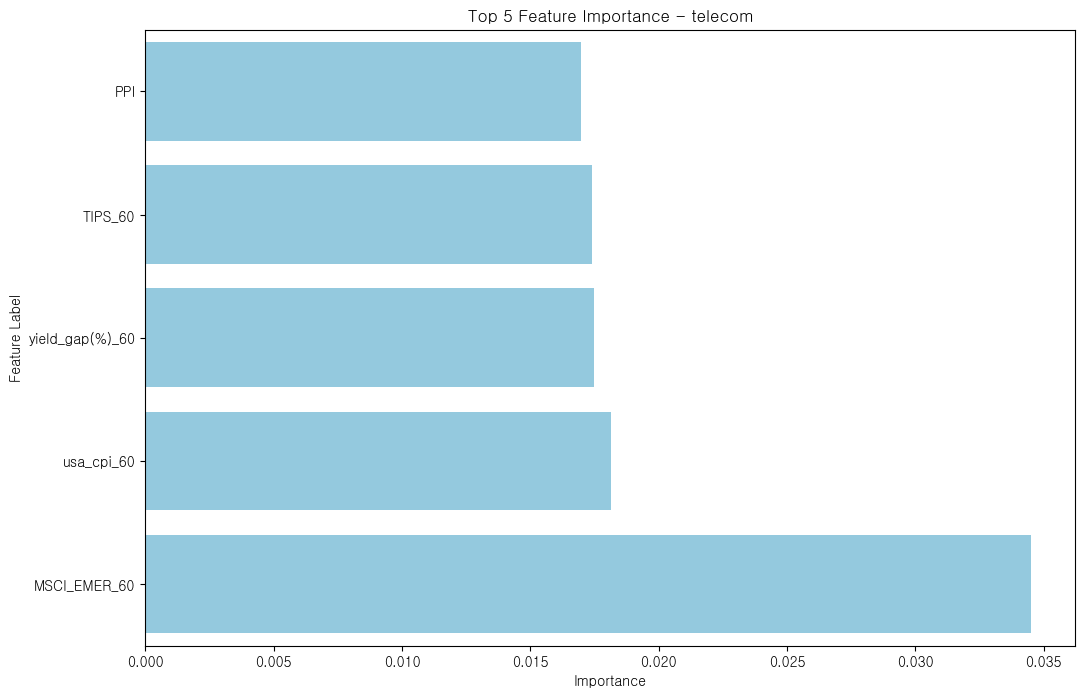

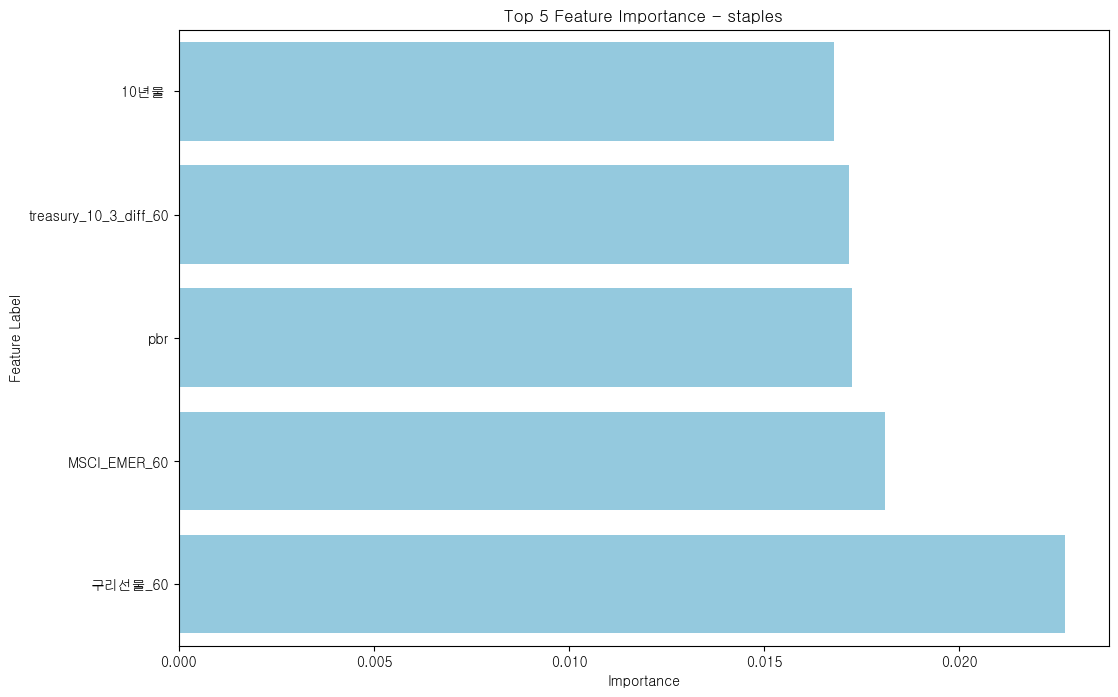

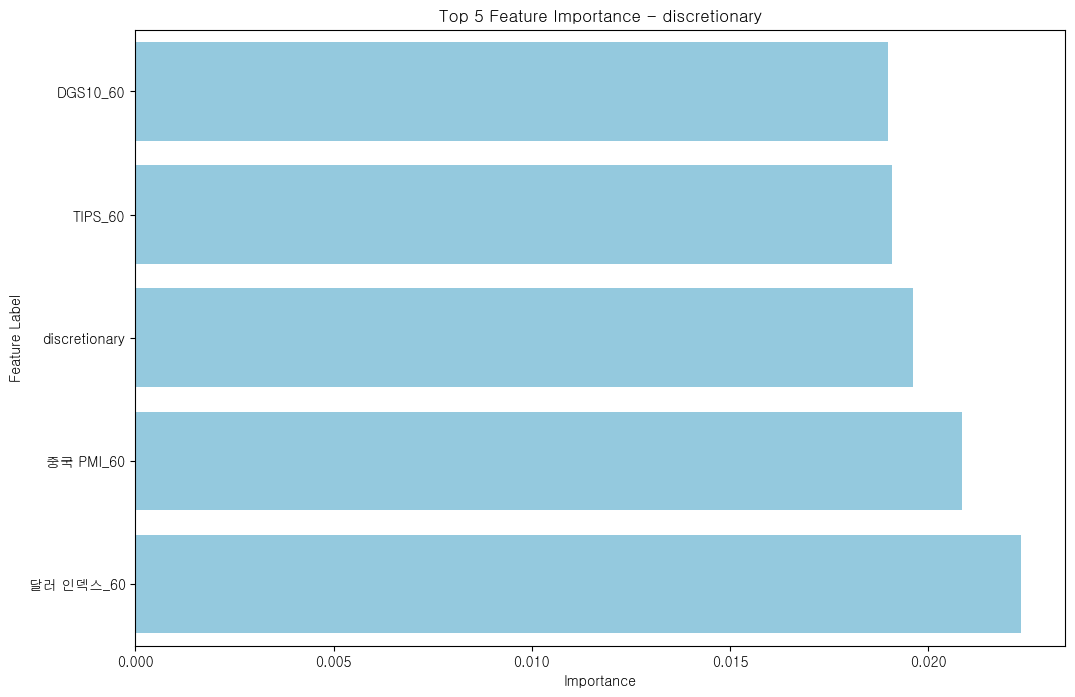

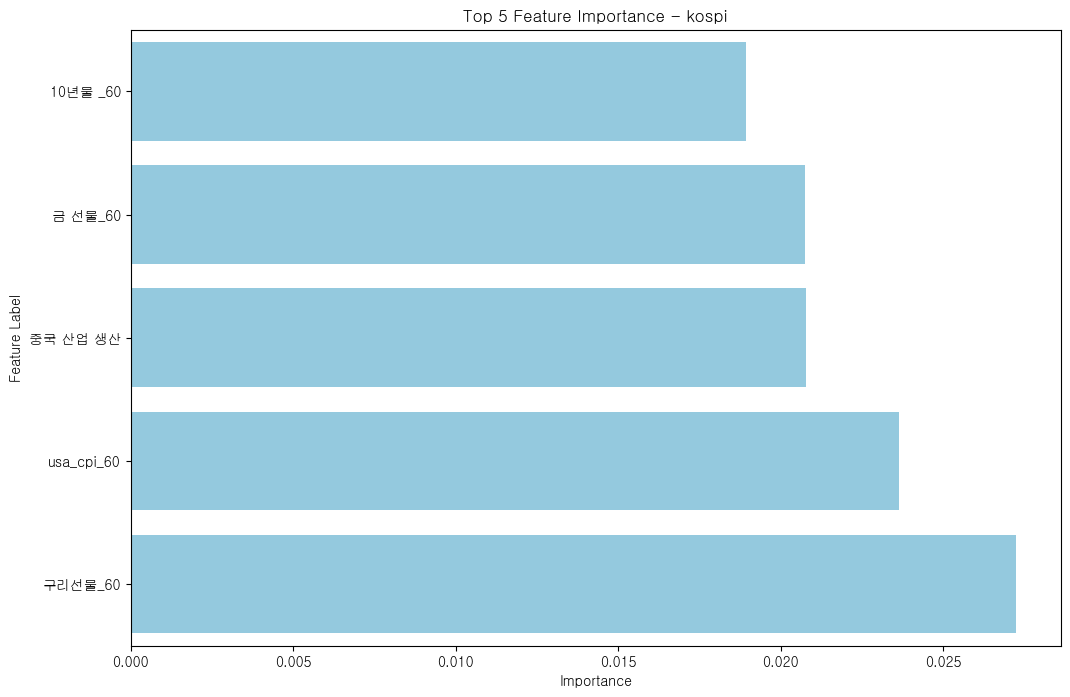

In [ ]:
# 상위 5개 특성의 이름과 중요도 분리하여 그래프 출력
import matplotlib.pyplot as plt
import seaborn as sns

# 한글 폰트 설정
from matplotlib import font_manager, rc
path = f'C:/Windows/Fonts/gulim.ttc'
font_name = font_manager.FontProperties(fname=path).get_name()
rc('font', family=font_name)
for keyword, data_split in data_splits.items():
    X_train = data_split['X_train']
    y_train = data_split['y_train']

    best_estimator = best_estimators_per_keyword[keyword]
    best_depth = best_depths_per_keyword[keyword]

    # RandomForestClassifier 초기화 및 학습
    rfc = RandomForestClassifier(n_estimators=best_estimator, 
                                 max_depth=best_depth, 
                                 max_leaf_nodes=300,
                                 n_jobs=-1,
                                 random_state=0)
    rfc.fit(X_train, y_train)

    # Feature Importance 계산
    feats = {}
    for feature, importance in zip(range(X_train.shape[1]), rfc.feature_importances_):
        feats[feature] = importance

    # 중요도 순으로 정렬하여 상위 5개 선택
    sorted_feats = sorted(feats.items(), key=lambda x: x[1], reverse=True)
    top_5_importances = sorted_feats[:5]

    # 상위 5개 특성의 이름과 중요도 분리
    top_5_features = [column_names_per_keyword[keyword][feature_index] for feature_index, _ in top_5_importances]
    top_5_importance_values = [importance for _, importance in top_5_importances]

    # 그래프 출력
    plt.figure(figsize=(12, 8))
    sns.barplot(x=top_5_importance_values, y=top_5_features, color='skyblue')
    plt.title(f'Top 5 Feature Importance - {keyword}')
    plt.xlabel('Importance')
    plt.ylabel('Feature Label')
    plt.gca().invert_yaxis()  # y축 라벨 역순으로 표시
    plt.show()


Model for auto keyword saved as plk_folder/auto_model.pkl
Model for construct keyword saved as plk_folder/construct_model.pkl
Model for capital_market keyword saved as plk_folder/capital_market_model.pkl
Model for chemicals keyword saved as plk_folder/chemicals_model.pkl
Model for equipment keyword saved as plk_folder/equipment_model.pkl
Model for transport keyword saved as plk_folder/transport_model.pkl
Model for semi keyword saved as plk_folder/semi_model.pkl
Model for bank keyword saved as plk_folder/bank_model.pkl
Model for steel keyword saved as plk_folder/steel_model.pkl
Model for telecom keyword saved as plk_folder/telecom_model.pkl
Model for staples keyword saved as plk_folder/staples_model.pkl
Model for discretionary keyword saved as plk_folder/discretionary_model.pkl
Model for kospi keyword saved as plk_folder/kospi_model.pkl

< AI model: save >
Model for auto keyword loaded from plk_folder/auto_model.pkl
Model for construct keyword loaded from plk_folder/construct_model.pkl


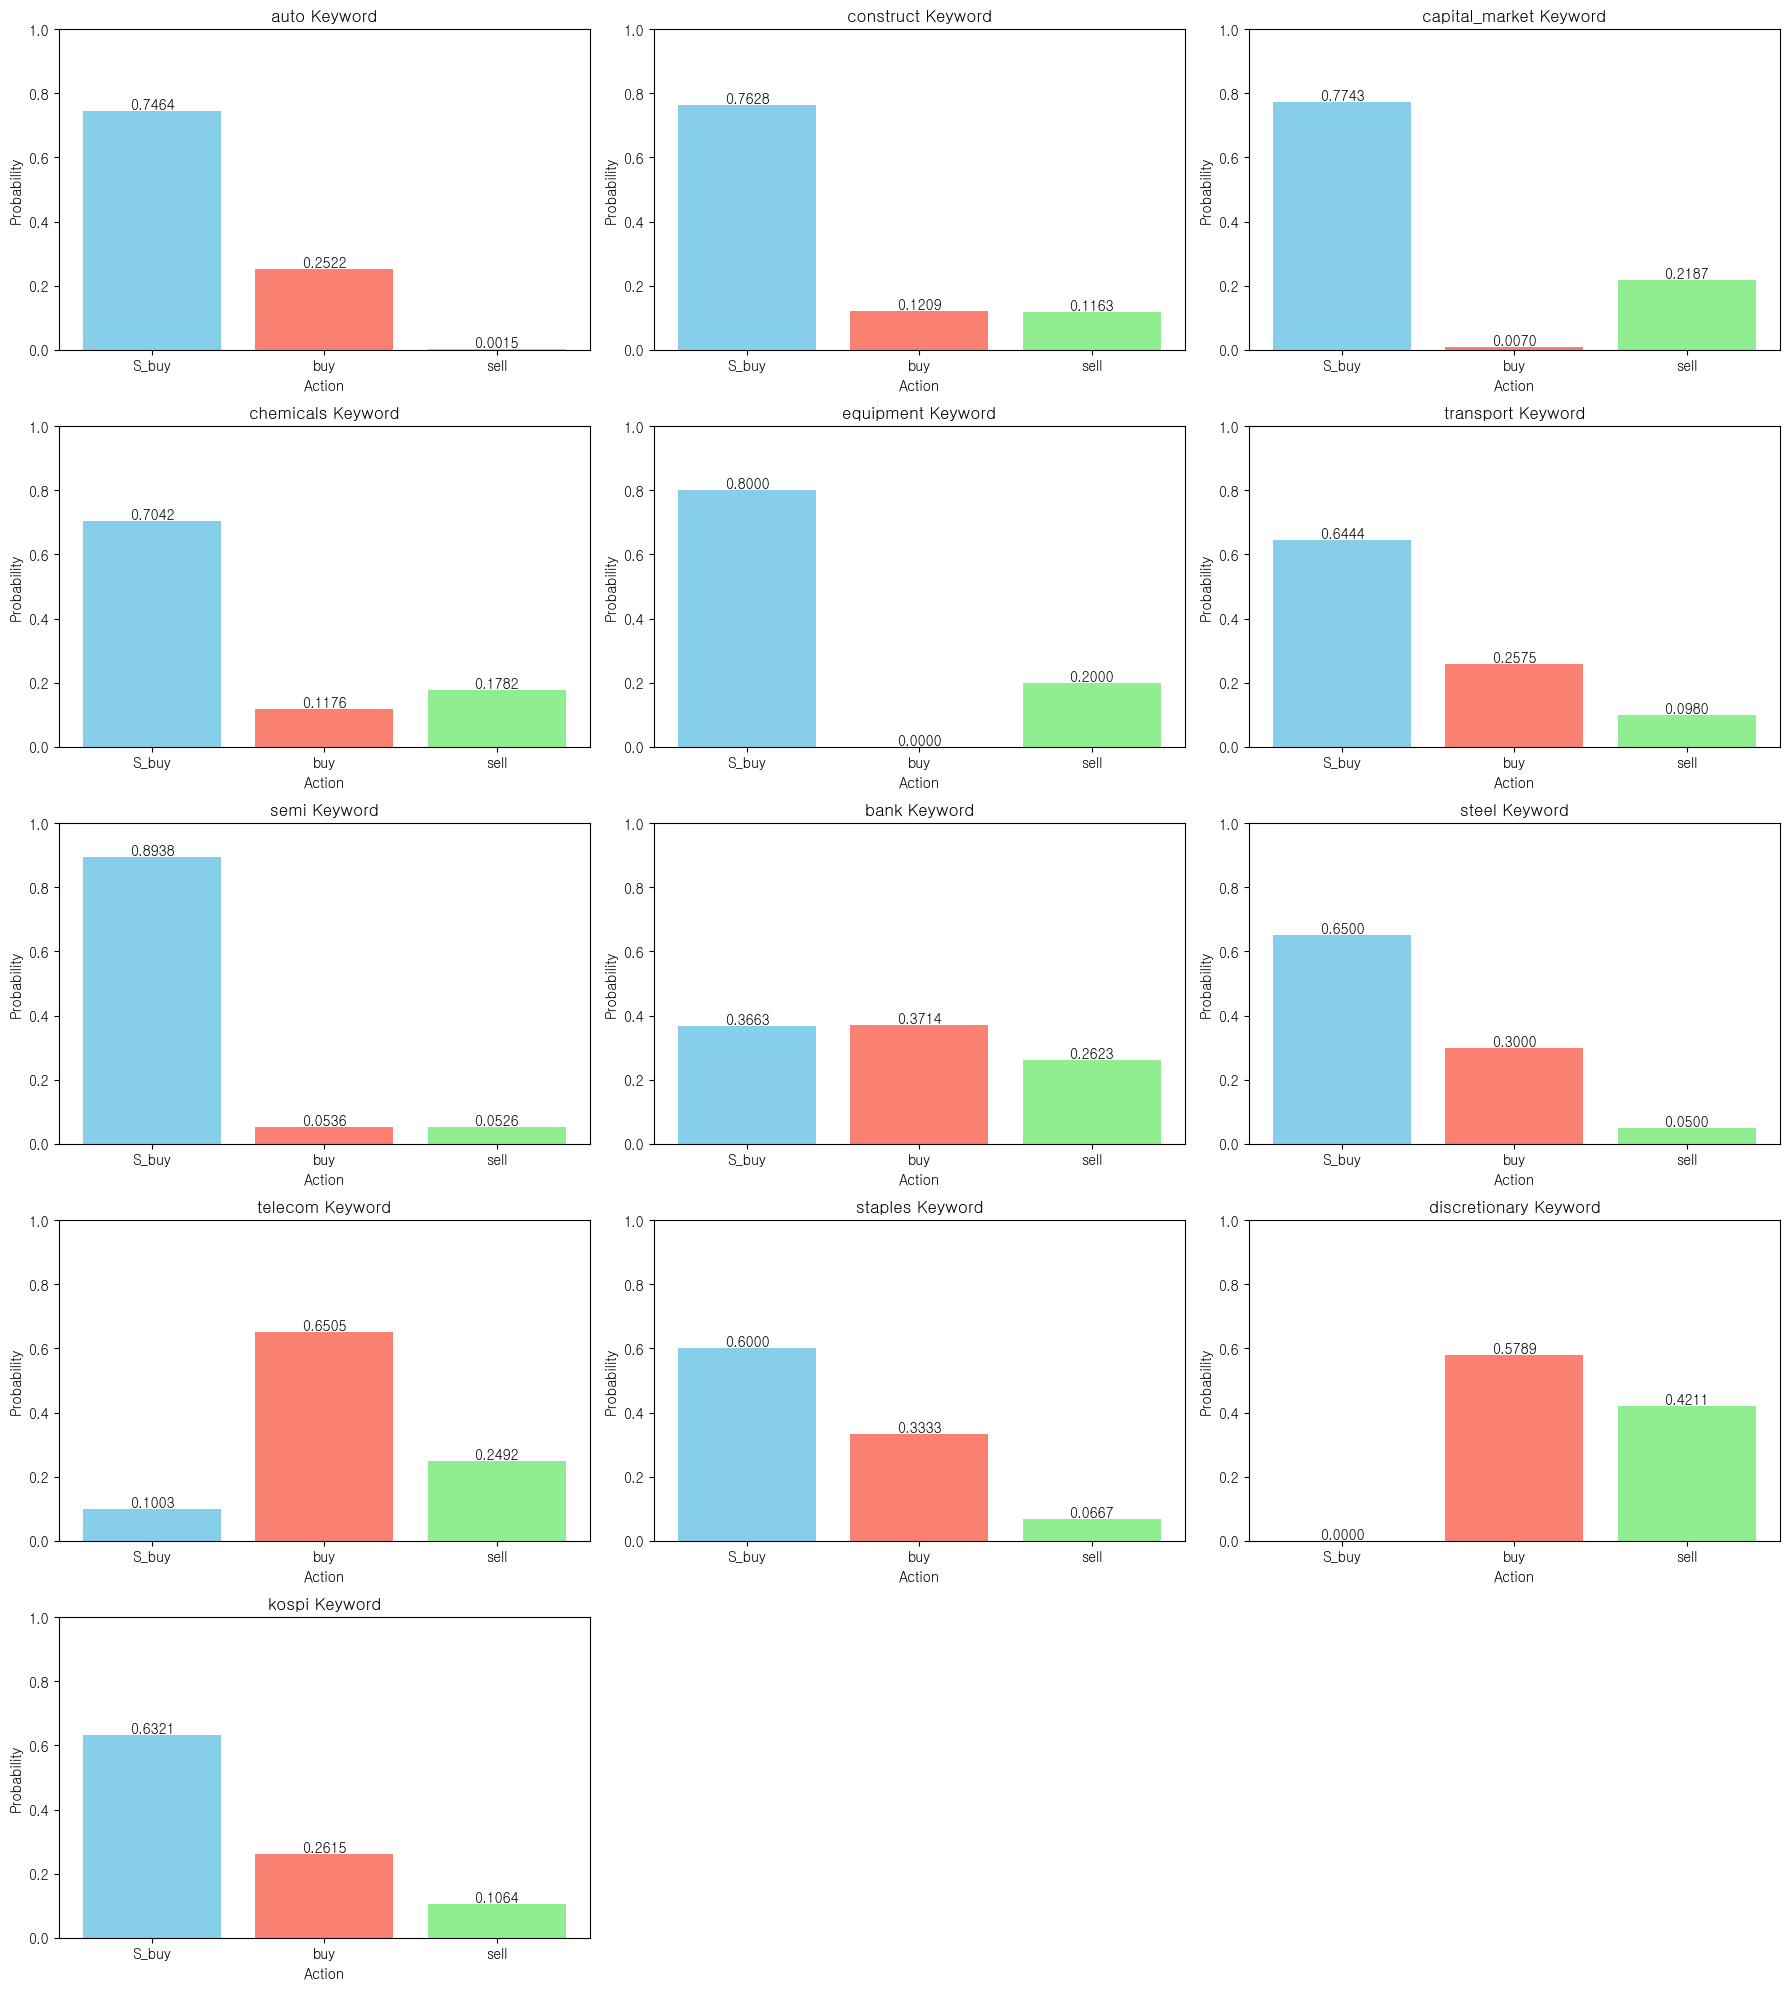

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from joblib import dump, load
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

# 디렉토리가 없다면 생성
if not os.path.exists('plk_folder'):
    os.makedirs('plk_folder')

# 각 키워드별로 최종 모델 학습 및 모델 저장
for keyword, data_split in data_splits.items():
    X_train = data_split['X_train']
    y_train = data_split['y_train']

    # RandomForestClassifier 초기화
    rfc = RandomForestClassifier(n_estimators=best_estimators_per_keyword[keyword], 
                                 max_depth=best_depths_per_keyword[keyword], 
                                 max_leaf_nodes=300,
                                 n_jobs=-1,
                                 random_state=0)

    # 최종 모델 학습
    rfc.fit(X_train, y_train)

    # 모델 저장
    filename = f"plk_folder/{keyword}_model.pkl"
    dump(rfc, filename)
    print(f"Model for {keyword} keyword saved as {filename}")

print("\n< AI model: save >")

# 모델 로드
loaded_models = {}

# 각 키워드별로 모델 로드
for keyword in keywords:
    filename = f"plk_folder/{keyword}_model.pkl"
    if os.path.exists(filename):
        loaded_models[keyword] = load(filename)
        print(f"Model for {keyword} keyword loaded from {filename}")
    else:
        print(f"Model file for {keyword} keyword does not exist: {filename}")

print("\n< AI model: load >")

# 각 키워드별로 S_buy, buy, sell의 확률 예측
probabilities = {}
for keyword, model in loaded_models.items():
    X_test = data_splits[keyword]['X_test'][-1].reshape(1, -1)

    # 각 클래스의 확률 예측
    prob_current = model.predict_proba(X_test)
    s_buy_buy_sum = prob_current[0][0] + prob_current[0][1]

    probabilities[keyword] = {'S_buy': prob_current[0][0], 'buy': prob_current[0][1], 'sell': prob_current[0][2]}

# 그래프로 출력
num_keywords = len(probabilities)
num_rows = (num_keywords + 2) // 3
num_cols = min(num_keywords, 3)
plt.figure(figsize=(6 * num_cols, 4 * num_rows))

for i, (keyword, probs) in enumerate(probabilities.items(), start=1):
    plt.subplot(num_rows, num_cols, i)
    plt.bar(probs.keys(), probs.values(), color=['skyblue', 'salmon', 'lightgreen'])
    plt.title(f'{keyword} Keyword')
    plt.xlabel('Action')
    plt.ylabel('Probability')
    plt.ylim(0, 1)  # Set y-axis limit from 0 to 1
    for j, prob in enumerate(probs.values()):
        plt.text(j, prob, f'{prob:.4f}', ha='center', va='bottom')
plt.tight_layout()
plt.show()


Model for auto keyword saved as plk_folder/auto_model.pkl
Model for construct keyword saved as plk_folder/construct_model.pkl
Model for capital_market keyword saved as plk_folder/capital_market_model.pkl
Model for chemicals keyword saved as plk_folder/chemicals_model.pkl
Model for equipment keyword saved as plk_folder/equipment_model.pkl
Model for transport keyword saved as plk_folder/transport_model.pkl
Model for semi keyword saved as plk_folder/semi_model.pkl
Model for bank keyword saved as plk_folder/bank_model.pkl
Model for steel keyword saved as plk_folder/steel_model.pkl
Model for telecom keyword saved as plk_folder/telecom_model.pkl
Model for staples keyword saved as plk_folder/staples_model.pkl
Model for discretionary keyword saved as plk_folder/discretionary_model.pkl
Model for kospi keyword saved as plk_folder/kospi_model.pkl

< AI model: save >
Model for auto keyword loaded from plk_folder/auto_model.pkl
Model for construct keyword loaded from plk_folder/construct_model.pkl


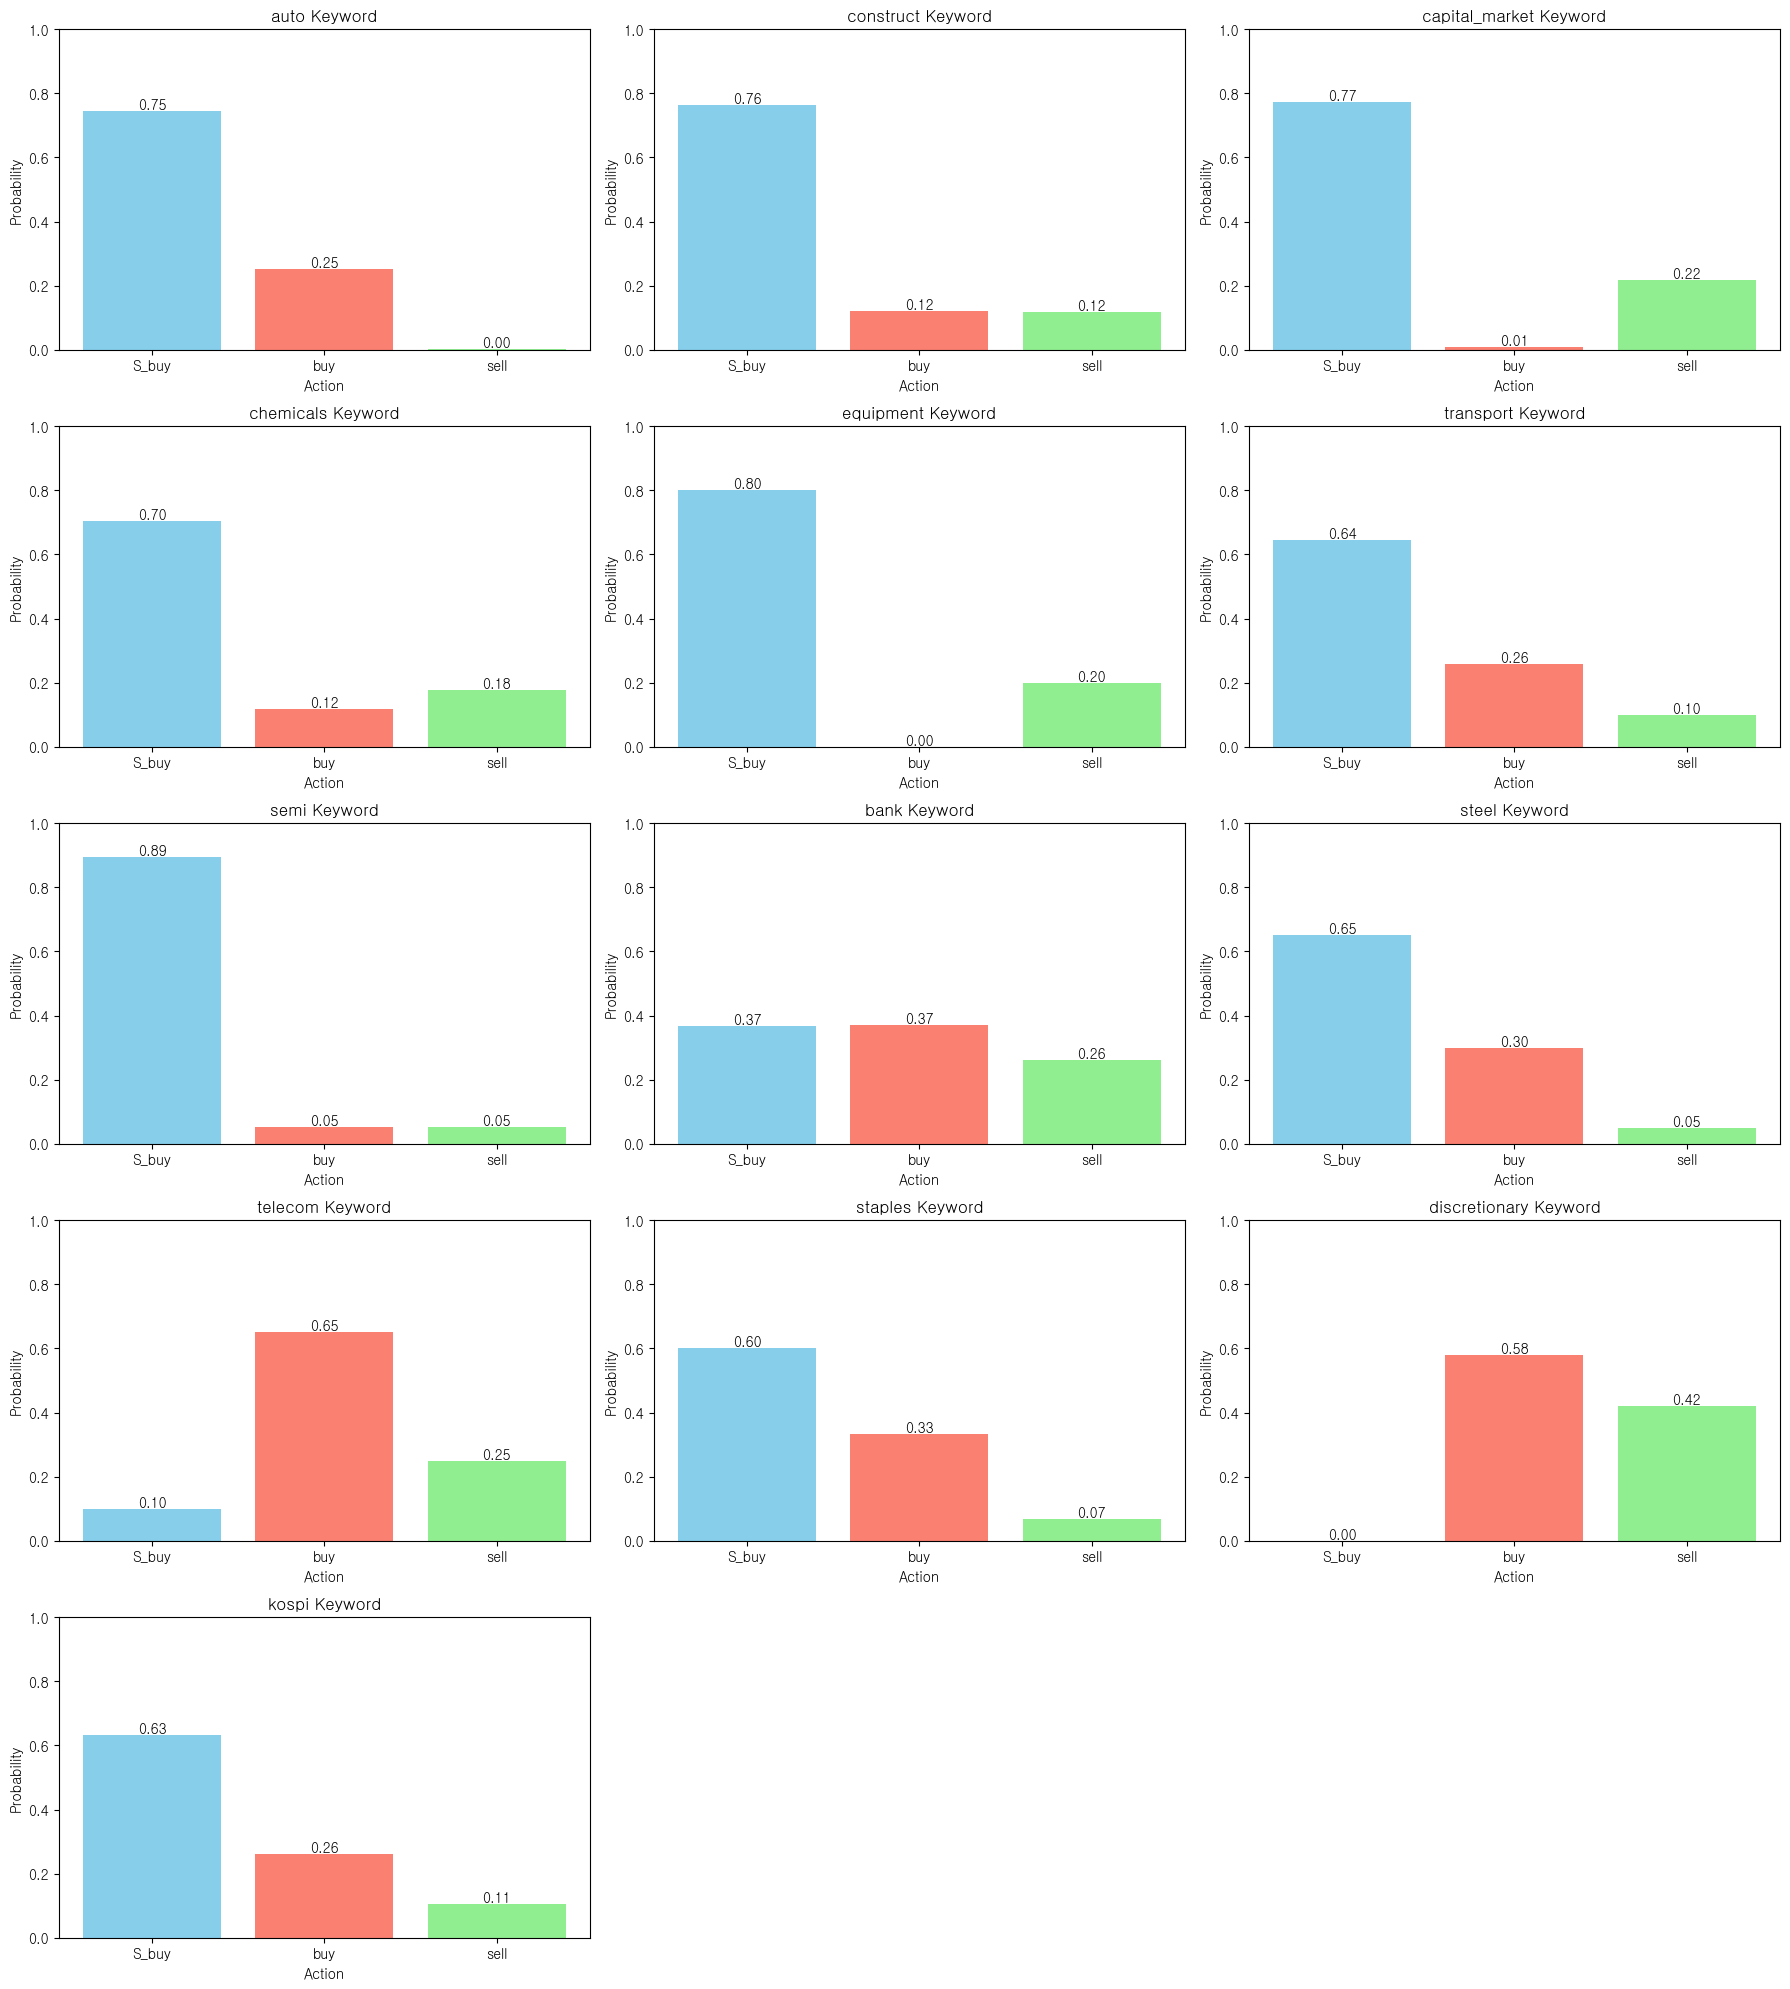

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from joblib import dump, load
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

# 디렉토리가 없다면 생성
if not os.path.exists('plk_folder'):
    os.makedirs('plk_folder')

# 각 키워드별로 최종 모델 학습 및 모델 저장
for keyword, data_split in data_splits.items():
    X_train = data_split['X_train']
    y_train = data_split['y_train']

    # RandomForestClassifier 초기화
    rfc = RandomForestClassifier(n_estimators=best_estimators_per_keyword[keyword], 
                                 max_depth=best_depths_per_keyword[keyword], 
                                 max_leaf_nodes=300,
                                 n_jobs=-1,
                                 random_state=0)

    # 최종 모델 학습
    rfc.fit(X_train, y_train)

    # 모델 저장
    filename = f"plk_folder/{keyword}_model.pkl"
    dump(rfc, filename)
    print(f"Model for {keyword} keyword saved as {filename}")

print("\n< AI model: save >")

# 모델 로드
loaded_models = {}

# 각 키워드별로 모델 로드
for keyword in keywords:
    filename = f"plk_folder/{keyword}_model.pkl"
    if os.path.exists(filename):
        loaded_models[keyword] = load(filename)
        print(f"Model for {keyword} keyword loaded from {filename}")
    else:
        print(f"Model file for {keyword} keyword does not exist: {filename}")

print("\n< AI model: load >")

# 각 키워드별로 S_buy, buy, sell의 확률 예측
probabilities = {}
for keyword, model in loaded_models.items():
    X_test = data_splits[keyword]['X_test'][-1].reshape(1, -1)

    # 각 클래스의 확률 예측
    prob_current = model.predict_proba(X_test)
    y_names = model.classes_

    # 결과 저장
    probabilities[keyword] = {'S_buy': prob_current[0][0], 'buy': prob_current[0][1], 'sell': prob_current[0][2]}

# 그래프로 출력
num_keywords = len(probabilities)
num_rows = (num_keywords + 2) // 3
num_cols = min(num_keywords, 3)
plt.figure(figsize=(6 * num_cols, 4 * num_rows))

for i, (keyword, probs) in enumerate(probabilities.items(), start=1):
    plt.subplot(num_rows, num_cols, i)
    plt.bar(probs.keys(), probs.values(), color=['skyblue', 'salmon', 'lightgreen'])
    plt.title(f'{keyword} Keyword')
    plt.xlabel('Action')
    plt.ylabel('Probability')
    plt.ylim(0, 1)  # Set y-axis limit from 0 to 1
    for j, prob in enumerate(probs.values()):
        plt.text(j, prob, f'{prob:.2f}', ha='center', va='bottom')
plt.tight_layout()
plt.show()